In [1]:
import gensim
import pickle
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from neurotools.io.gdrive import download_sheets_doc
from neurotools.io.files import load_embedding_model
from itertools import product
from sklearn.externals import joblib
from ast import literal_eval
%matplotlib inline


# PROCESS EMBEDDING AND DIMENSIONS

## LOAD EMBEDDING AND DIMENSIONS

In [2]:
emb, word2rank_dict = load_embedding_model('005_en_in_commoncrawl_v1_20180330.bin')

In [3]:
cutoff = round((1/5)*len(word2rank_dict))

In [4]:
def get_average_vector(words, emb):
    """
        Average the word vectors of a list of words.
    """
    words_in_emb = [emb[word] for word in words if word in emb.vocab.keys()]
    total = np.sum(words_in_emb, axis=0)
    count = len(words_in_emb)
    return total / count

In [5]:
dimensions_doc_id = '1qa6hmUwjipTocTLIAIBEuObkzVGwWUvYXV04HjMw0BM'
dimensions_doc = download_sheets_doc(dimensions_doc_id, has_column_labels=True)
dimensions_nf = dimensions_doc['dimensions_v2.csv']
dimensions_nf = dimensions_nf.loc[(dimensions_nf['whisky_relevant'] == '1') & (dimensions_nf['en'] != ''), ['en_label', 'en']]
dimensions_nf['en_label'] = 'nf_' + dimensions_nf['en_label']

KeyboardInterrupt: 

In [ ]:
diageo_dimensions_doc_id = '1_OdlI2ieNMAXAepeqtjDIghRVj6Lgoaf9caiZK8jmkA'
diageo_dimensions_doc = download_sheets_doc(diageo_dimensions_doc_id, has_column_labels=True)
dimensions_diageo = diageo_dimensions_doc['Dimensions']
dimensions_diageo = dimensions_diageo.loc[dimensions_diageo['Content'] != '', ['Dimension', 'Content']]
dimensions_diageo['Dimension'] = 'dg_' + dimensions_diageo['Dimension']

In [ ]:
dimensions_nf.columns = ['Dimension', 'Content']

In [ ]:
dimensions_nf.shape

In [ ]:
dimensions = pd.concat([dimensions_diageo, dimensions_nf], axis=0, ignore_index=True)

In [ ]:
dimensions.append{}

In [63]:
dimensions

,Dimension,Content
0,dg_Relaxed,relax unwind enjoy soothe calm serene leisurel...
1,dg_Confident,confident optimistic hopeful reassure certainl...
2,dg_Welcoming,welcome greet warmly hospitable invite graciou...
3,dg_Social,social civil collective community cordial
4,dg_Playful,playful delightful lighthearted lively flirtat...
5,dg_Street-Smart,hardened astute cunning experienced savvy stre...
6,dg_Progressive,progressive dynamic enlightened modern
7,dg_Stylish,stylish classy chic trendy elegant fashionable...
8,dg_Inspiring,inspired inspiration passionate incredible upl...
9,dg_Authentic,authentic genuine unique unpretentious


In [71]:
additions = [{'Dimension': 'dg_flavour', 'Content': 'rich malt fruity simple delicate sweetness'},
{'Dimension': 'dg_brand', 'Content': 'street wise street smart smart thinking'}]

In [73]:
dimensions = dimensions.append(additions)

In [74]:
dimensions.to_csv('csv/dimensions.csv', index=False)

In [7]:
dimensions = pd.read_csv('csv/dimensions.csv')

## GET WORD VECTORS OF DIMENSIONS

In [8]:
dimensions['tokens'] = dimensions['Content'].str.lower().str.replace(r'[^a-z ]', '').str.split()

In [9]:
dimensions['wv'] = dimensions['tokens'].map(lambda x: get_average_vector(x, emb))

In [10]:
dimensions.head()

,Dimension,Content,tokens,wv
0,dg_Relaxed,relax unwind enjoy soothe calm serene leisurel...,"[relax, unwind, enjoy, soothe, calm, serene, l...","[-0.38982093, 1.0310897, -0.3649658, -1.062084..."
1,dg_Confident,confident optimistic hopeful reassure certainl...,"[confident, optimistic, hopeful, reassure, cer...","[0.35235944, -2.103267, 0.75326306, -2.0183167..."
2,dg_Welcoming,welcome greet warmly hospitable invite graciou...,"[welcome, greet, warmly, hospitable, invite, g...","[0.32264853, -1.3409846, 0.8682901, -1.4583006..."
3,dg_Social,social civil collective community cordial,"[social, civil, collective, community, cordial]","[0.95336664, -1.0829761, 1.1170304, -0.0309140..."
4,dg_Playful,playful delightful lighthearted lively flirtat...,"[playful, delightful, lighthearted, lively, fl...","[-0.72059196, -0.50438666, -0.35774776, -1.436..."


In [10]:
dimensions.shape[0]

48

# LOAD CANDIDATE WORDS

In [5]:
diageo_words_doc_id = '1Vc_NYmC69G0KkdvrUS79jhhu85p5wkhfGnwc9aHTDeM'
diageo_words_doc = download_sheets_doc(diageo_words_doc_id, has_column_labels=True)

In [6]:
sheetnames = list(diageo_words_doc.keys())

In [314]:
pool = []
for sheetname in sheetnames:
    sheet = diageo_words_doc[sheetname]
    words = list(sheet.loc[sheet['Select']=='1', 'Word'].values)
    print(sheetname, len(words))
    pool.extend(words)
pool = set(pool)

malt 25
sweet, sweetness 0
streetwise, streetsmart, thinking, clever, sharp, ease 41
smooth, smoothness 42
richness, rich 0
Smart thinking, Select Indian Barley, delicate sweetness 45
Smart thinking, Extra Malt, rich taste 37
Smart thinking, Select Indian Barley, smooth taste 43
fruity 45
woody wood taste 38
grain 0
malt, rich, malt, fruity, simple, delicate, sweetness 49
malt, streetwise, streetsmart, thinking, clever, sharp, ease 0
grain, rich, malt, fruity, simple, delicate, sweetness 0
malt + brand and flavour profile 47


In [11]:
ingredients = ['malt', 'grain']
flavors = ['sweet, sweetness',
           'richness, rich',
           'smooth, smoothness',
           'fruity',
           'woody wood taste']
smart_thinking = ['streetwise, streetsmart, thinking, clever, sharp, ease', 'smooth, smoothness']

In [7]:
def get_words_from_df(df):
    return list(df['Word'].values)

In [8]:
def filter_words_on_cutoff(words, word2rank_dict, cutoff):
    return [word for word in words if word2rank_dict[word] < cutoff]

In [12]:
def get_words_for_hook(sheet_dict, hook_keys, word2rank_dict, cutoff=None):
    container = []
    for key in hook_keys:
        container.extend(get_words_from_df(sheet_dict[key]))
    words = list(set(container))#filter_words_on_cutoff(set(container), word2rank_dict, cutoff)
    return words

In [13]:
words_ingredients = get_words_for_hook(diageo_words_doc, ingredients, word2rank_dict)
words_flavors = get_words_for_hook(diageo_words_doc, flavors, word2rank_dict)
words_smart_thinking = get_words_for_hook(diageo_words_doc, smart_thinking, word2rank_dict)

In [14]:
used = set(words_ingredients+words_flavors+words_smart_thinking)

In [15]:
# pool.difference(used)

In [16]:
pool_flavor = ['flavourful', 'good', 'tasty', 'heady']
pool_ingredients = ['wine', 'vanilla', 'mix', 'acidity']
pool_brandprofile = ['elegant', 'traditional', 'subtly', 'subtlety', 'softness', 'select', 'refine', 'pure', 'perfect', 'indian', 'combination', 'extra']

In [17]:
# Check words used in pool only

In [18]:
words_flavors = set(words_flavors + pool_flavor)
words_ingredients = set(words_ingredients + pool_ingredients)
words_smart_thinking = set(words_smart_thinking + pool_brandprofile)

In [19]:
def get_df_for_hook(words):
    df = pd.DataFrame(list(words), columns = ['word'])
    df['wv'] = df['word'].map(lambda x: get_average_vector([x], emb))
    return df

In [20]:
df_ingredients = get_df_for_hook(words_ingredients)
df_flavors = get_df_for_hook(words_flavors)
df_smart_thinking = get_df_for_hook(words_smart_thinking)

In [11]:
df_flavors['wv']

NameError: name 'df_flavors' is not defined

# GET SIMILARITY OF WORDS WITH WHISKY AND VALENCE SCORE

In [22]:
def cosine_similarity(a,b):
    """
        Compute the cosine similarity of a and b.
    """
    return np.dot(a,b) / ( (np.dot(a,a) **.5) * (np.dot(b,b) ** .5) )

In [21]:
def get_similarity_with_dimensions(row, dims):
    """
        Get similarity of row's word vector and every dimension.
        row : row of the movie dataframe
        dimensions : dataframe containing Neuroflash dimensions
    """
    for k in range(dims['Dimension'].shape[0]):
        name = 'dim_' + str(dims['Dimension'].iloc[k])
        # define a new column for the cosine similarity of dimension k and the post text
        row[name] = cosine_similarity(row['wv'], dims['wv'].iloc[k])
    return row

In [ ]:
get_average_vector

In [867]:
emb['wine']

array([ 3.12859631e+00,  5.63978243e+00, -1.11328948e+00,  9.78257239e-01,
        8.86707544e-01,  2.86602187e+00,  2.73073339e+00, -1.89743078e+00,
       -2.72002792e+00, -4.32392687e-01, -3.84630990e+00, -3.55590248e+00,
        1.13366854e+00,  3.19952154e+00,  1.65417099e+00, -3.38791460e-01,
       -4.38173962e+00,  2.14409757e+00,  4.40845108e+00, -1.78225267e+00,
        1.94151974e+00,  3.62369967e+00,  3.02927494e+00, -8.11605692e-01,
       -3.80828410e-01,  4.07733822e+00, -4.07268572e+00,  8.53009522e-01,
       -9.66469169e-01,  8.12578440e-01, -4.40815687e+00, -5.41481495e-01,
       -1.13459535e-01, -1.06740855e-02, -2.38381553e+00, -2.86162996e+00,
        1.20207334e+00,  5.88009298e-01,  5.27566850e-01, -1.62599087e-01,
       -2.24560046e+00,  1.38448358e+00, -1.10878730e+00,  4.72949409e+00,
       -2.77334833e+00,  8.70236158e-01,  3.34541249e+00, -1.36922395e+00,
        7.93125033e-01, -1.67220747e+00, -4.90027237e+00, -4.55043048e-01,
       -2.13533449e+00, -

In [866]:
cosine_similarity(emb['wine'], chosen_ones['wv'].iloc[2])

0.10612034050003

In [869]:
ti.apply(lambda x: get_similarity_with_dimensions(x, chosen_ones), axis=1)

[-5.6632280e-02 -6.1966372e-01 -3.5924151e+00 -4.5506129e+00
  4.0362744e+00 -1.9895054e+00  4.5420017e+00 -1.4307302e+00
 -2.9497252e+00 -1.2670957e+00  2.7827179e+00  1.3189304e+00
 -1.3953220e+00 -3.3116491e+00 -8.6059891e-02 -2.3244937e-01
 -2.0119038e+00  9.0068835e-01  4.3986106e+00  1.3423511e+00
  1.4167872e-01 -3.0076370e+00  2.8671733e-01 -5.1070195e-01
  1.6733929e+00 -7.3588175e-01 -4.2530656e+00 -2.9839429e-01
  1.6293200e+00  1.8904766e+00 -1.7271081e+00 -1.3866411e+00
  4.4975643e+00  1.3040549e+00  1.2816206e+00 -1.5614716e+00
 -3.5487874e+00  1.4657317e+00 -8.3690238e-01  9.4289082e-01
  1.2908472e+00 -5.9300880e+00 -4.6472979e-01  2.0618722e+00
 -1.9529867e+00 -2.2037824e-04  2.7370435e-01  3.0213206e+00
 -3.2774803e-01  8.6502947e-02  7.8949772e-02 -3.2529107e-01
 -1.3532500e-01  6.3107181e-01  1.2574903e+00  5.2478218e-01
  3.8978128e+00  1.0281882e+00  1.9229786e-01  1.0166001e-01
 -1.5693970e+00  1.0512885e+00  1.5178555e+00 -3.7228696e+00
 -1.6736447e+00 -1.36451

,word,rank_quartile,wv,dim_dg_malt,dim_dg_smoothness,dim_dg_smart_thinking,dim_dg_richness
16,whisky,0,"[-0.54163176, -0.17018767, -4.2682977, -4.0342...",0.058162,-0.012255,-0.052535,-0.012166
81,malt,0,"[3.209099, 2.2221382, -2.089252, -7.7997236, 1...",0.058804,0.090041,0.002046,0.010999
26,whiskey,0,"[-0.831017, -1.12423, -3.7720158, -4.8803287, ...",0.044887,-0.001831,-0.049742,-0.023416
56,mix,0,"[-5.3860607, 3.07963, -7.167593, -4.8098693, 3...",0.041013,0.070021,0.016658,0.045188
34,vodka,0,"[1.5312555, -0.055978477, -4.4284463, -0.82952...",0.024443,-0.009657,-0.068333,-0.032349
37,scotch,0,"[1.2256864, 0.7422834, -4.0921254, -3.0269558,...",0.021629,0.101323,0.026576,-0.043705
29,bourbon,0,"[2.1120124, 0.92899954, -5.234706, -2.309924, ...",0.083556,0.068093,0.016188,0.007610
33,fruity,1,"[3.6052017, -0.62754023, -3.4658227, -4.446645...",0.072241,0.070505,0.035778,0.031728
39,decanter,1,"[0.41531315, -2.3948588, -3.6227896, -4.716717...",0.039846,0.110974,0.019309,-0.042047
11,wine,0,"[-0.05663228, -0.6196637, -3.592415, -4.550613...",0.060807,0.005965,-0.071725,-0.048942


In [330]:
valence_model = joblib.load('005_en_in_commoncrawl_v1_2018_0330.pkl')

In [331]:
def get_df_whisky_sim_and_valence_score(df):
    df['used_in_graph'] = (df['word'].map(lambda x: x in pool)).astype(int)
    df['rank'] = df['word'].map(word2rank_dict)
    df['rank_quartile'] = pd.qcut(df['rank'], 3, [0,1,2])
    df['rank_in_top20%'] = (df['rank'] < cutoff).astype(int)
    df['sim_whisky'] = df['wv'].map(lambda x: cosine_similarity(x, emb['whisky']))
    df['valence'] = df['wv'].map(lambda x: valence_model.predict(x.reshape(1, -1))[0][0])
    df['sum_sim_valence'] = df['sim_whisky'] + df['valence']
    df = df.drop(['wv'], axis=1)
    df = df.sort_values('sum_sim_valence', ascending=False)
    return df

In [332]:
df_flavors = get_df_whisky_sim_and_valence_score(df_flavors)
df_ingredients = get_df_whisky_sim_and_valence_score(df_ingredients)
df_smart_thinking = get_df_whisky_sim_and_valence_score(df_smart_thinking)

In [334]:
df_flavors.to_csv('csv/pool_flavor_by_sum.csv', index=False)
df_ingredients.to_csv('csv/pool_ingredients_by_sum.csv', index=False)
df_smart_thinking.to_csv('csv/pool_brandprofile_by_sum.csv', index=False)

df_flavors.sort_values('sim_whisky', ascending=False).to_csv('csv/pool_flavor_by_whisky.csv', index=False)
df_ingredients.sort_values('sim_whisky', ascending=False).to_csv('csv/pool_ingredients_by_whisky.csv', index=False)
df_smart_thinking.sort_values('sim_whisky', ascending=False).to_csv('csv/pool_brandprofile_by_whisky.csv', index=False)

df_flavors.sort_values('valence', ascending=False).to_csv('csv/pool_flavor_by_valence.csv', index=False)
df_ingredients.sort_values('valence', ascending=False).to_csv('csv/pool_ingredients_by_valence.csv', index=False)
df_smart_thinking.sort_values('valence', ascending=False).to_csv('csv/pool_brandprofile_by_valence.csv', index=False)

# Revisions on malt

In [23]:
copy_bubble_graph = '1awUTgvb-R_4_Hv8exj13pBICOyjOXZ7tutXfC2BBvz4'
copy_bubble_graph = download_sheets_doc(copy_bubble_graph, has_column_labels=True)

In [25]:
copy_bubble_graph.keys()

dict_keys(['final pool_ingredients_by_sum', 'old pool_ingredients_by_sum', 'pool_flavor_by_sum', 'pool_brandprofile_by_sum', 'pool_flavor_by_whisky', 'pool_flavor_by_valence', 'pool_ingredients_by_whisky', 'pool_ingredients_by_valence', 'pool_brandprofile_by_whisky', 'pool_brandprofile_by_valence'])

In [26]:
df_ingredients = copy_bubble_graph['final pool_ingredients_by_sum']

In [34]:
list(df_ingredients['word'].head(10).values)

['whisky',
 'malt',
 'whiskey',
 'mix',
 'scotch',
 'fruity',
 'malty',
 'distill',
 'mlx',
 'starch']

In [89]:
df_ingredients['rank_quartile'] = pd.qcut(df_ingredients['rank'], 3, [0,1,2])

# Diageo Selected Dimensions

In [33]:
winner_words = '1TwJ6ychV5At6qhU-nVtBqqEDvVTiTAUuD0YxglwkwIc'
winner_words = download_sheets_doc(winner_words, has_column_labels=True)

In [34]:
label = ['Dimension', 'tokens']
malt = ['dg_malt', ['malt']]
smoothness = ['dg_smoothness', ['smooth', 'creamy', 'easy', 'fluid', 'gentle', 'mild', 'serene', 'silky', 'velvety', 'sleek']]
smart_thinking =['dg_smart_thinking', ['streetwise', 'streetsmart', 'thinking', 'clever', 'sharp', 'ease']]
richness = ['dg_richness', ['rich', 'richness']]

In [35]:
chosen_ones = pd.DataFrame.from_records([malt, smoothness, smart_thinking, richness], columns=label)

In [36]:
chosen_ones['wv'] = chosen_ones['tokens'].map(lambda x: get_average_vector(x, emb))

In [37]:
chosen_ones

,Dimension,tokens,wv
0,dg_malt,[malt],"[0.6481842, 3.2436092, -1.630463, 0.0014497653..."
1,dg_smoothness,"[smooth, creamy, easy, fluid, gentle, mild, se...","[-1.3913215, 1.5429388, -1.9929647, -0.1399003..."
2,dg_smart_thinking,"[streetwise, streetsmart, thinking, clever, sh...","[-0.22701593, 0.6035686, -0.97848374, 1.718363..."
3,dg_richness,"[rich, richness]","[-0.9195142, 2.466971, -1.8364742, -0.9397965,..."


# Chosen Word Analysis

In [35]:
df_flavors = pd.read_csv('csv/pool_flavor_by_sum.csv')
# df_ingredients = pd.read_csv('csv/pool_ingredients_by_sum.csv')
df_smart_thinking = pd.read_csv('csv/pool_brandprofile_by_sum.csv')


In [37]:
def return_top_k_words(df, k):
    return (df[['word', 'rank_quartile']].head(k))

In [43]:
tf = return_top_k_words(df_flavors, 10)
ts = return_top_k_words(df_smart_thinking, 10)
ti = return_top_k_words(df_ingredients, 10)


KeyError: "['rank_quartile'] not in index"

In [44]:
ts.word.values

array(['ensure', 'perfect', 'elegant', 'attractive', 'witty', 'gentle',
       'comfortable', 'crisp', 'effortless', 'combination'], dtype=object)

In [17]:
# tf = pd.read_csv('csv/top_flavors_rank.csv')
# ti = pd.read_csv('csv/top_ingredients_rank.csv')
# ts = pd.read_csv('csv/top_smart_thinking_rank.csv')

In [97]:
tf['wv'] = tf['word'].map(lambda x: get_average_vector([x], emb))
ti['wv'] = ti['word'].map(lambda x: get_average_vector([x], emb))
ts['wv'] = ts['word'].map(lambda x: get_average_vector([x], emb))

In [98]:
dimensions

,Dimension,Content,tokens,wv
0,dg_Relaxed,relax unwind enjoy soothe calm serene leisurel...,"[relax, unwind, enjoy, soothe, calm, serene, l...","[-0.38982093, 1.0310897, -0.3649658, -1.062084..."
1,dg_Confident,confident optimistic hopeful reassure certainl...,"[confident, optimistic, hopeful, reassure, cer...","[0.35235944, -2.103267, 0.75326306, -2.0183167..."
2,dg_Welcoming,welcome greet warmly hospitable invite graciou...,"[welcome, greet, warmly, hospitable, invite, g...","[0.32264853, -1.3409846, 0.8682901, -1.4583006..."
3,dg_Social,social civil collective community cordial,"[social, civil, collective, community, cordial]","[0.95336664, -1.0829761, 1.1170304, -0.0309140..."
4,dg_Playful,playful delightful lighthearted lively flirtat...,"[playful, delightful, lighthearted, lively, fl...","[-0.72059196, -0.50438666, -0.35774776, -1.436..."
5,dg_Street-Smart,hardened astute cunning experienced savvy stre...,"[hardened, astute, cunning, experienced, savvy...","[0.5428526, -0.6341953, 0.20049101, 1.5594413,..."
6,dg_Progressive,progressive dynamic enlightened modern,"[progressive, dynamic, enlightened, modern]","[1.0941542, 2.5804703, -2.152933, 0.59269804, ..."
7,dg_Stylish,stylish classy chic trendy elegant fashionable...,"[stylish, classy, chic, trendy, elegant, fashi...","[-1.191978, 1.7011402, 1.0752823, 1.9200199, -..."
8,dg_Inspiring,inspired inspiration passionate incredible upl...,"[inspired, inspiration, passionate, incredible...","[-0.24694943, -0.6879463, 0.584088, -2.380513,..."
9,dg_Authentic,authentic genuine unique unpretentious,"[authentic, genuine, unique, unpretentious]","[-0.27662054, 0.351289, 1.2155161, -0.6435494,..."


In [20]:
topnf = dimensions.loc[dimensions['Dimension'].isin(['nf_fascination', 'nf_healthy_positive', 'nf_winner', 'nf_new']),:]

In [21]:
combined_dim = pd.DataFrame(topnf.sum(axis=0)).T.drop(columns=['Content', 'tokens'])
combined_dim['Dimension'] = 'nf_combined_NF'
combined_dim['wv'] = combined_dim['wv'] / 4

In [22]:
topnf

,Dimension,Content,tokens,wv
32,nf_fascination,fascination fascinated inspired intrigued capt...,"[fascination, fascinated, inspired, intrigued,...","[-0.20270893, -0.1365449, 0.3074824, -1.327063..."
34,nf_healthy_positive,high-antioxidant vitamin rich healthy energy-b...,"[highantioxidant, vitamin, rich, healthy, ener...","[0.15723427, 3.7546878, -2.7901852, -0.8372670..."
35,nf_winner,winner champ first award medal champion pride ...,"[winner, champ, first, award, medal, champion,...","[-0.40822226, 1.4663633, -1.189739, -2.7032104..."
39,nf_new,new fresh all_new brand_new model,"[new, fresh, allnew, brandnew, model]","[-2.320692, 0.29747605, -0.6233991, 0.8257017,..."


In [23]:
emb.similar_by_vector(combined_dim.iloc[0]['wv'])

[('new', 0.5616099834442139),
 ('youthful', 0.5115505456924438),
 ('inspiration', 0.47537297010421753),
 ('fascination', 0.46487510204315186),
 ('mystique', 0.4506576359272003),
 ('inspire', 0.44925087690353394),
 ('passion', 0.4444175958633423),
 ('unique', 0.4412081837654114),
 ('timeless', 0.43579623103141785),
 ('newness', 0.43383049964904785)]

In [24]:
clustered = pd.read_csv('csv/clustered_dims.csv')
clustered['wv'] = clustered['wv'].map(literal_eval)

In [25]:
clustered

,wv,Dimension
0,"[0.24479248775885656, 0.9547597502286618, -0.5...",nf_sensual
1,"[-2.3206920623779297, 0.29747605323791504, -0....",nf_fresh
2,"[-0.4082222580909729, 1.4663633108139038, -1.1...",nf_winner
3,"[1.1638178825378418, 2.4766998291015625, 0.099...",nf_modern


In [26]:
def get_similarity_based_on(df, mode):
    if mode == 'diageo':
        dims = chosen_ones
    elif mode == 'top_nf' or mode == 'top_nf_sel':
        dims = topnf
    elif mode == 'nf':
        dims = dimensions
    elif mode == 'diageo+nf':
        dims = pd.concat([chosen_ones[['Dimension', 'wv']], topnf[['Dimension', 'wv']]], axis=0)
    elif mode == 'diageo+nfreduced':
        dims = pd.concat([chosen_ones[['Dimension', 'wv']], combined_dim[['Dimension', 'wv']]], axis=0)
    elif mode == 'clustered':
        dims = clustered
    elif mode == 'diageo+clustered':
        dims = pd.concat([chosen_ones[['Dimension', 'wv']], clustered[['Dimension', 'wv']]], axis=0)
    return df.apply(lambda x: get_similarity_with_dimensions(x, dims), axis=1)

In [32]:
clustered['Dimension'].values

array(['nf_sensual', 'nf_fresh', 'nf_winner', 'nf_modern'], dtype=object)

In [28]:
# tf = tf.apply(lambda x: get_similarity_with_dimensions(x, chosen_ones), axis=1)
# ti = ti.apply(lambda x: get_similarity_with_dimensions(x, chosen_ones), axis=1)
# ts = ts.apply(lambda x: get_similarity_with_dimensions(x, chosen_ones), axis=1)

In [38]:
cosine_similarity(ti.iloc[9,2], chosen_ones.iloc[2,2])

0.10612034050003

In [39]:
get_similarity_based_on(ti,'diageo')

,word,rank_quartile,wv,dim_dg_malt,dim_dg_smoothness,dim_dg_smart_thinking,dim_dg_richness
0,whisky,0,"[0.6444888, 2.4822702, -0.9400694, -0.91108155...",0.544938,0.121920,0.060536,0.189142
1,malt,0,"[0.6481842, 3.2436092, -1.630463, 0.0014497653...",1.000000,0.183508,-0.018847,0.207981
2,whiskey,0,"[2.2511766, 1.6950177, -2.5131228, -0.2741936,...",0.644054,0.124978,0.076005,0.143854
3,mix,0,"[0.3422256, 0.6156408, -2.1661308, 4.1513906, ...",0.297969,0.395926,0.269132,0.231068
4,vodka,0,"[3.4047813, 3.7254498, 1.0403978, -0.07533555,...",0.477994,0.122302,-0.021453,0.112826
5,scotch,0,"[0.9278203, 3.7112958, -0.3635818, -1.7889683,...",0.568000,0.116861,0.087418,0.143520
6,bourbon,0,"[3.240936, 0.76862717, 1.0419946, 0.9471218, 2...",0.528328,0.108856,0.057631,0.110466
7,fruity,1,"[-0.20207405, 2.010014, -0.6782314, -1.9031047...",0.434695,0.491944,0.146277,0.328329
8,decanter,1,"[-0.86819476, 2.052715, -1.3855063, 0.271363, ...",0.428267,0.088234,-0.019148,0.048869
9,wine,0,"[3.1285963, 5.6397824, -1.1132895, 0.97825724,...",0.375940,0.209324,0.106120,0.256598


In [40]:
def sum_over_dimensions(words_df, mode, sel = None):
    df = get_similarity_based_on(words_df, mode)
    if mode == 'diageo':
        filt = ['dim_dg_smart_thinking', 'dim_dg_malt', 'dim_dg_smoothness', 'dim_dg_richness']
    elif mode == 'nf':
        filt = [x for x in df.columns if 'dim_nf_' in x]
    elif mode == 'top_nf' or mode == 'top_nf_sel':
        filt = ['dim_nf_fascination', 'dim_nf_healthy_positive', 'dim_nf_winner', 'dim_nf_new']
        if sel != None:
            filt = [filt[sel]]
    elif mode == 'diageo+nf':
        filt = ['dim_dg_smart_thinking', 'dim_dg_malt', 'dim_dg_smoothness', 'dim_dg_richness'] + ['dim_nf_fascination', 'dim_nf_healthy_positive', 'dim_nf_winner', 'dim_nf_new']
    elif mode == 'diageo+nfreduced':
        filt = ['dim_dg_smart_thinking', 'dim_dg_malt', 'dim_dg_smoothness', 'dim_dg_richness'] + ['dim_nf_combined_NF']
    elif mode == 'clustered':
        filt = ['dim_nf_sensual', 'dim_nf_fresh', 'dim_nf_winner', 'dim_nf_modern']
    elif mode == 'diageo+clustered':
        filt = ['dim_dg_smart_thinking', 'dim_dg_malt', 'dim_dg_smoothness', 'dim_dg_richness'] + ['dim_nf_sensual', 'dim_nf_fresh', 'dim_nf_winner', 'dim_nf_modern']
    filt.reverse()
    labels = ['word', 'rank_quartile'] + filt + ['sum_over_dims']
    sum_df = pd.concat([df.iloc[:,:2], df[filt], df[filt].sum(axis=1)], axis=1)
    sum_df.columns = labels
    return sum_df.sort_values(['rank_quartile', 'sum_over_dims'], ascending=[True, False]).set_index('word')

In [41]:
all_dims = ['smart-thinking', 'malt', 'smoothness', 'richness', 'sensual', 'fresh', 'winner', 'modern', 'appealing', 'expensive', 'fascination', 'healthy-positive', 'mild', 'modern', 'natural', 'new', 'pleasant', 'attractive', 'Tasty', 'trendy', 'valuable', 'warm', 'combined-NF']

In [42]:
cols = list(plt.cm.tab20.colors[0:len(all_dims)]) + list(plt.cm.tab20b.colors[0:len(all_dims)])

In [43]:
random.seed(1)
random.shuffle(cols)

In [44]:
colors = dict(zip(all_dims, cols))

In [45]:
len(cols)

40

In [46]:
colors

{'Tasty': (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 'appealing': (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 'attractive': (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 'combined-NF': (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 'expensive': (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 'fascination': (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 'fresh': (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 'healthy-positive': (0.2235294117647059,
  0.23137254901960785,
  0.4745098039215686),
 'malt': (1.0, 0.4980392156862745, 0.054901960784313725),
 'mild': (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 'modern': (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 'natural': (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 'new': (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 'pleasant': (0.5490196078431373, 

In [113]:
sns.set_style("white")
sns.despine()


In [46]:
def solo_bar_plot(df, title, n, mode, sel = None):
    
    plt.figure(figsize=(20, 12))
    dat = sum_over_dimensions(df, mode, sel)
    ranks = dat['rank_quartile']
    
    y_pos = 0.9
    if mode == 'diageo':
        filt = ['dim_dg_smart_thinking', 'dim_dg_malt', 'dim_dg_smoothness', 'dim_dg_richness']
        y_pos = 0.9
    elif mode == 'nf':
        filt = [x for x in dat.columns if 'dim_nf_' in x]
        y_pos = 0.97
    elif mode == 'top_nf':
        filt = ['dim_nf_fascination', 'dim_nf_healthy_positive', 'dim_nf_winner', 'dim_nf_new']
        y_pos = 0.9
    elif mode == 'top_nf_sel':
        filt = ['dim_nf_fascination', 'dim_nf_healthy_positive', 'dim_nf_winner', 'dim_nf_new']
        filt = [filt[sel]]
    elif mode == 'diageo+nf':
        filt = ['dim_dg_smart_thinking', 'dim_dg_malt', 'dim_dg_smoothness', 'dim_dg_richness'] + ['dim_nf_fascination', 'dim_nf_healthy_positive', 'dim_nf_winner', 'dim_nf_new']        
        y_pos = 0.9
    elif mode == 'diageo+nfreduced':
        filt = ['dim_dg_smart_thinking', 'dim_dg_malt', 'dim_dg_smoothness', 'dim_dg_richness'] + ['dim_nf_combined_NF']
        y_pos = 0.9
    elif mode == 'clustered':
        filt = ['dim_nf_sensual', 'dim_nf_fresh', 'dim_nf_winner', 'dim_nf_modern']
    elif mode == 'diageo+clustered':
        filt = ['dim_dg_smart_thinking', 'dim_dg_malt', 'dim_dg_smoothness', 'dim_dg_richness'] + ['dim_nf_sensual', 'dim_nf_fresh', 'dim_nf_winner', 'dim_nf_modern']
    filt.reverse()
    dat = dat[filt]
#     dat = dat[['dim_dg_smart_thinking', 'dim_dg_malt', 'dim_dg_smoothness', 'dim_dg_richness']]
    dat.columns = [x[7:].replace('_', '-') for x in dat.columns]
    dat.plot.bar(ax = plt.gca(), stacked=True, rot=22, fontsize=25, align='center', color=pd.Series(dat.columns).map(colors))
    plt.axhline(y=0, xmin=0, xmax=len(dat.columns), color='k', linewidth=4)
    plt.gca().grid(False) 
    sns.despine()
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().tick_params(bottom=False)
    plt.xlabel('')
    plt.title(title, fontsize = 40)
    plt.legend(loc=(1.0,y_pos), fontsize=30, ncol=1, labelspacing=-2.5)
    width_dict = {0: 0.75, 1: 0.5, 2: 0.25}
    for container in plt.gca().containers:
        for index,cc in enumerate(container.get_children()):
            old_width = cc.get_width() 
            new_width = width_dict[ranks.iloc[index]]
            diff = new_width - old_width
            plt.setp(cc, width = new_width)
            plt.setp(cc, x = cc.get_x() - 0.5*diff)
    plt.ylabel('Association', fontsize = 35)
    if sel == None:
        plt.savefig('plot/pool_by{}_{}_{}.png'.format(mode, title, n), bbox_inches = 'tight', transparent=True)
    else:
        plt.savefig('plot/pool_by{}_{}_{}_sel{}.png'.format(mode, title, n, sel), bbox_inches = 'tight', transparent=True)        

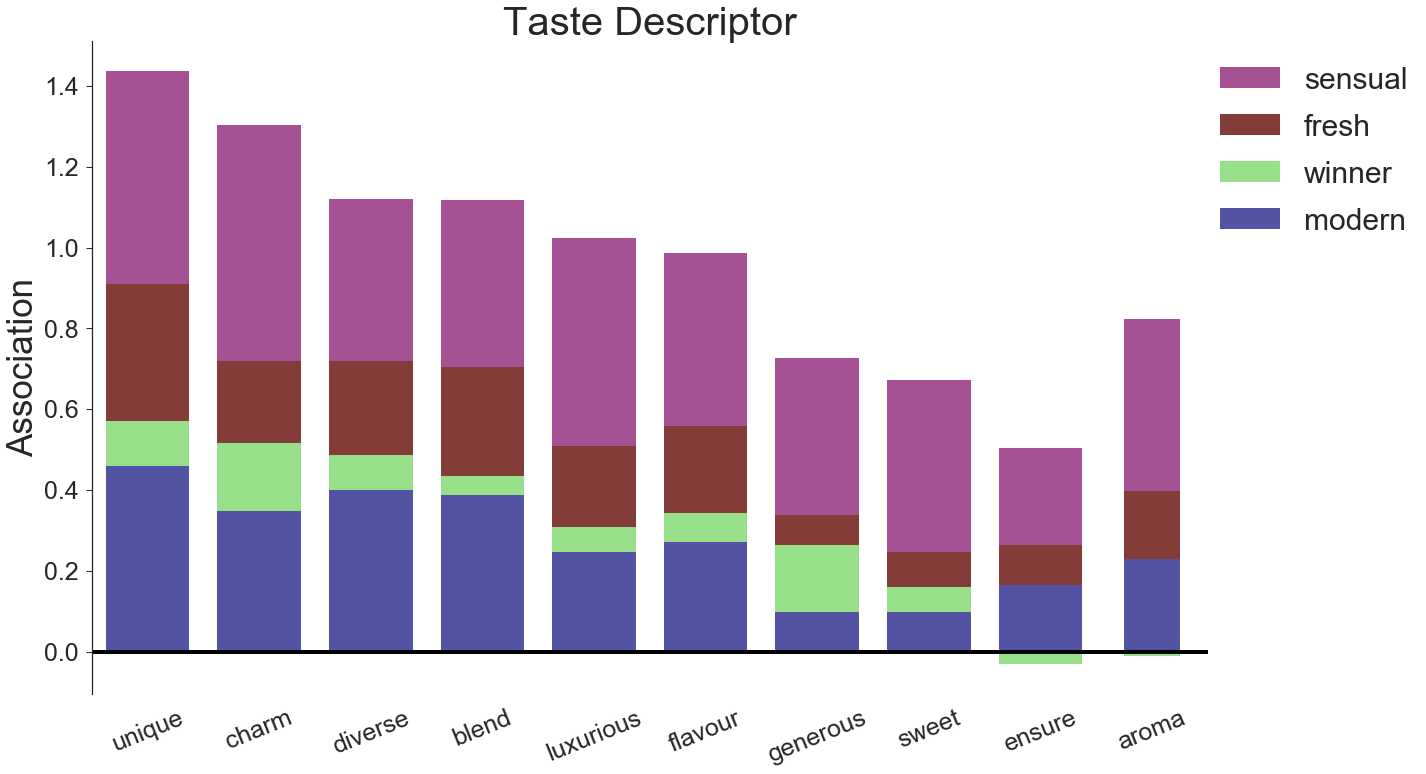

In [156]:
solo_bar_plot(tf, 'Taste Descriptor', 10, 'clustered')

diageo
nf
top_nf
diageo+nf
diageo+nfreduced
clustered
diageo+clustered


/Users/piocalderon/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


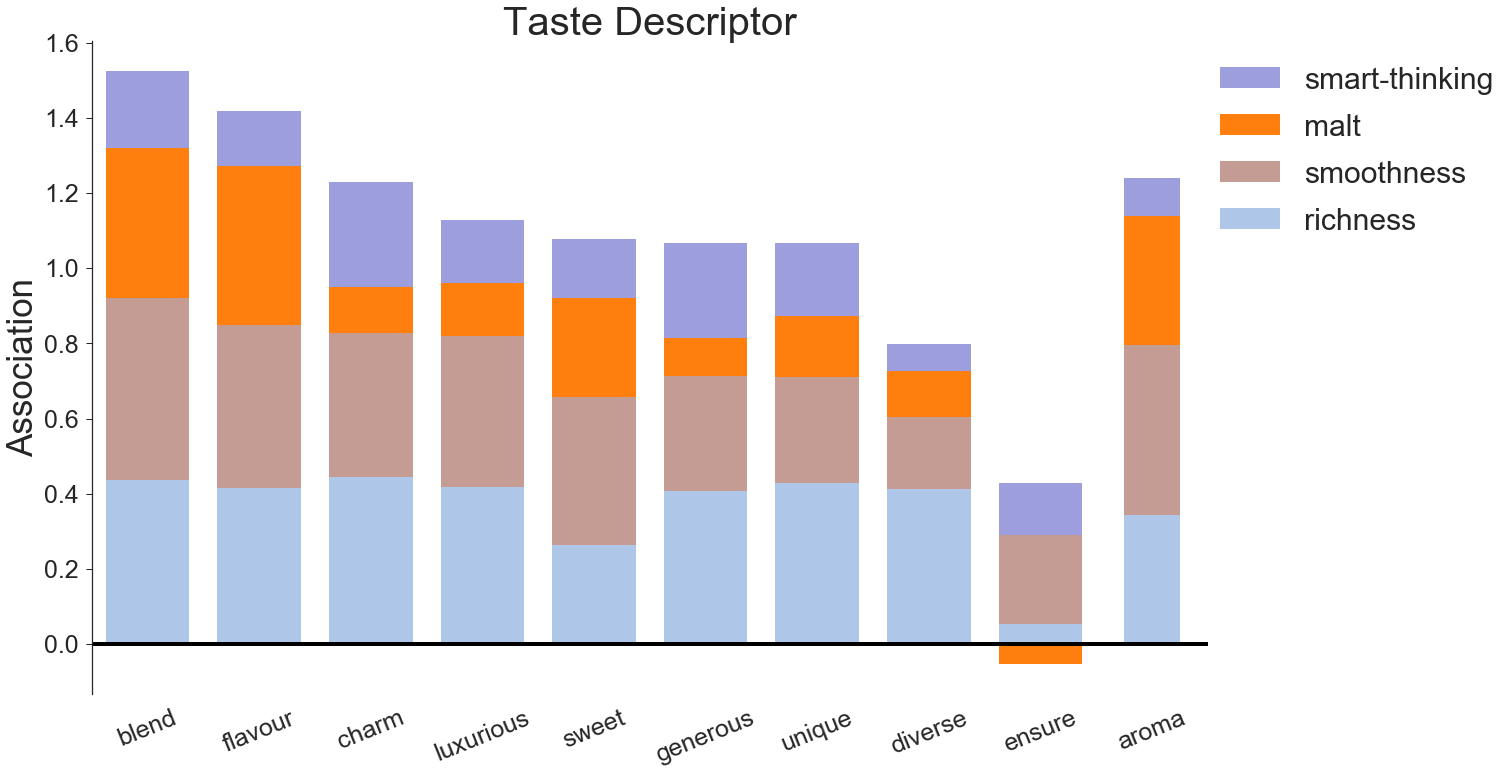

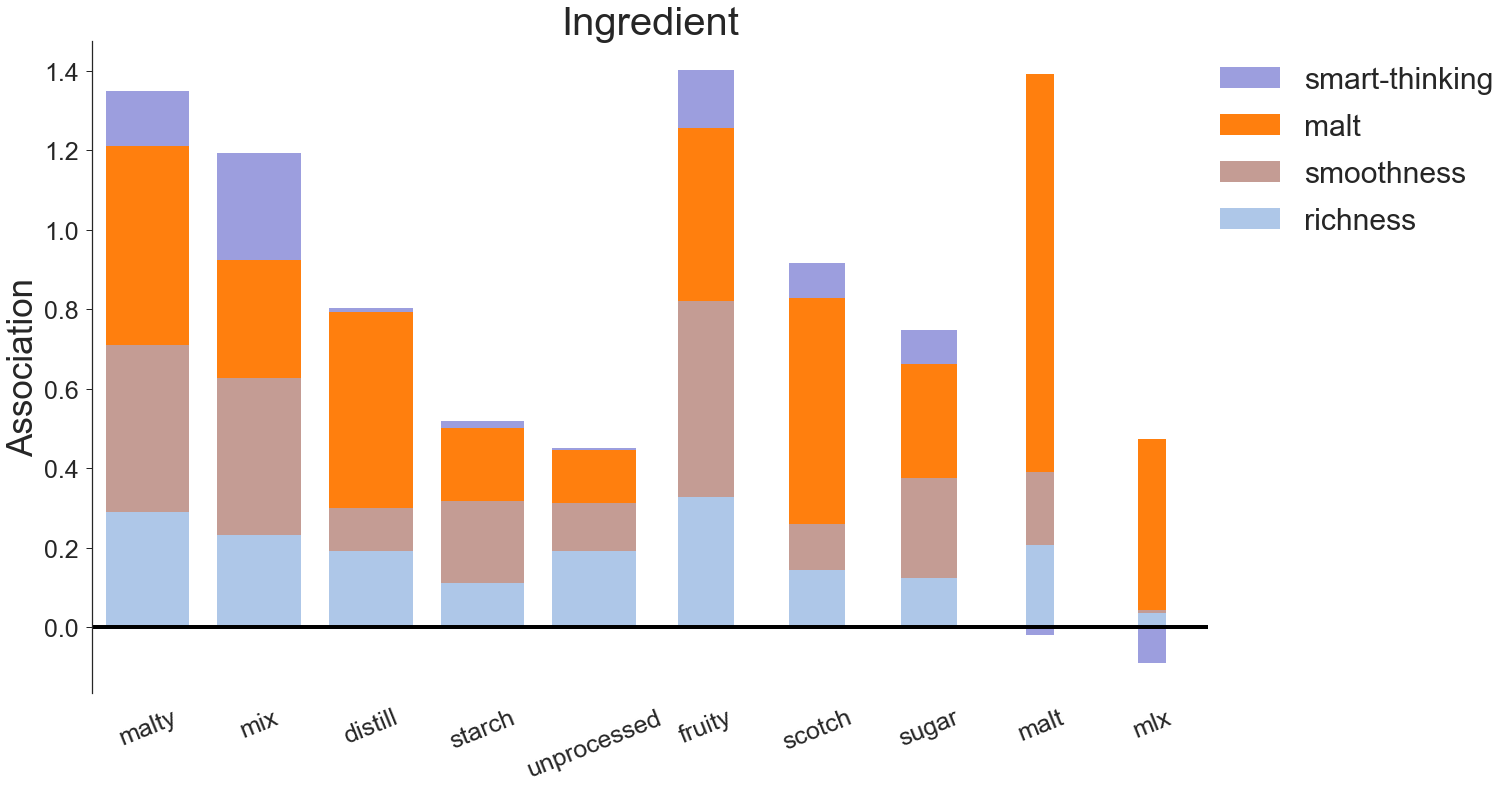

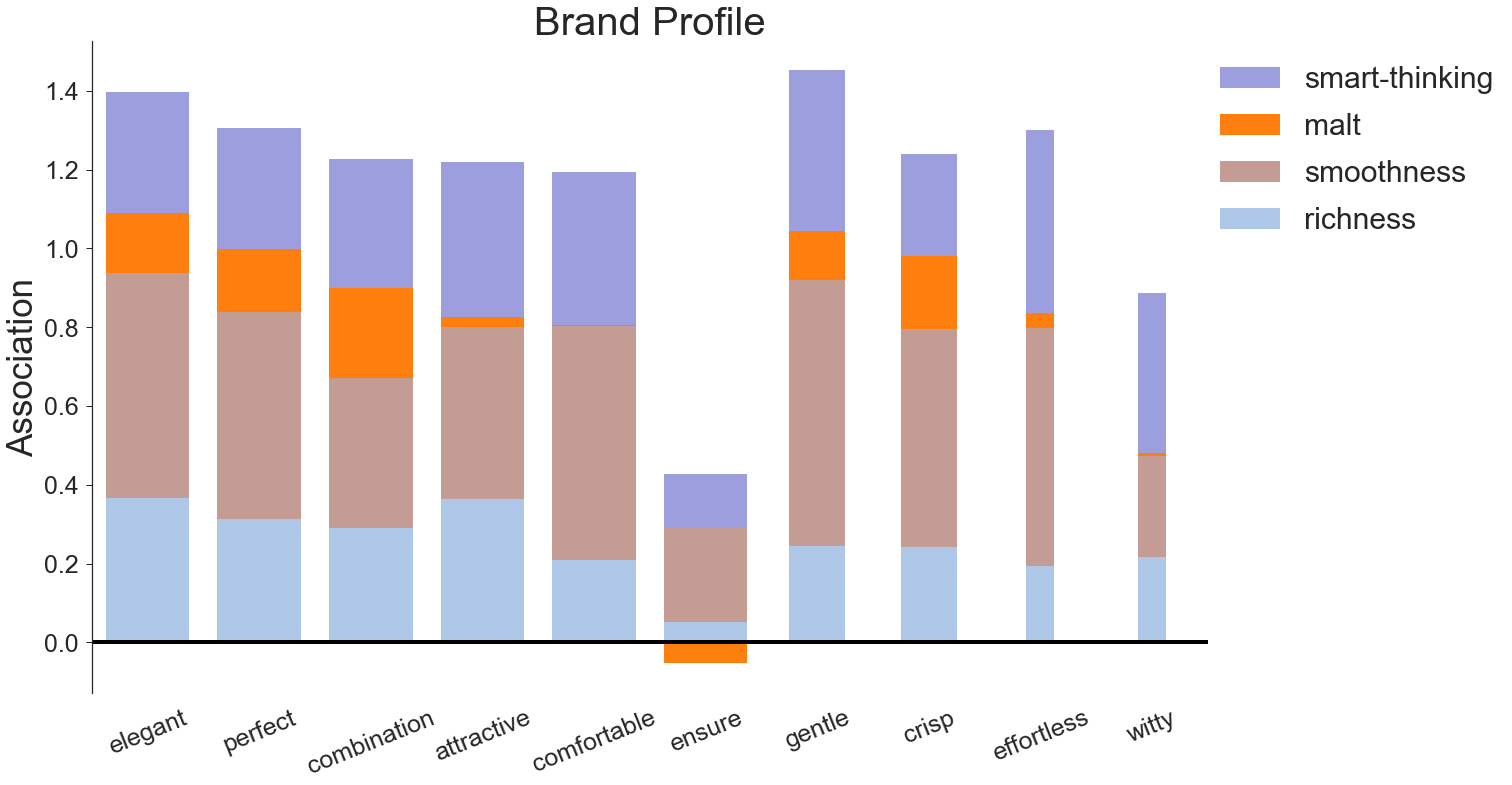

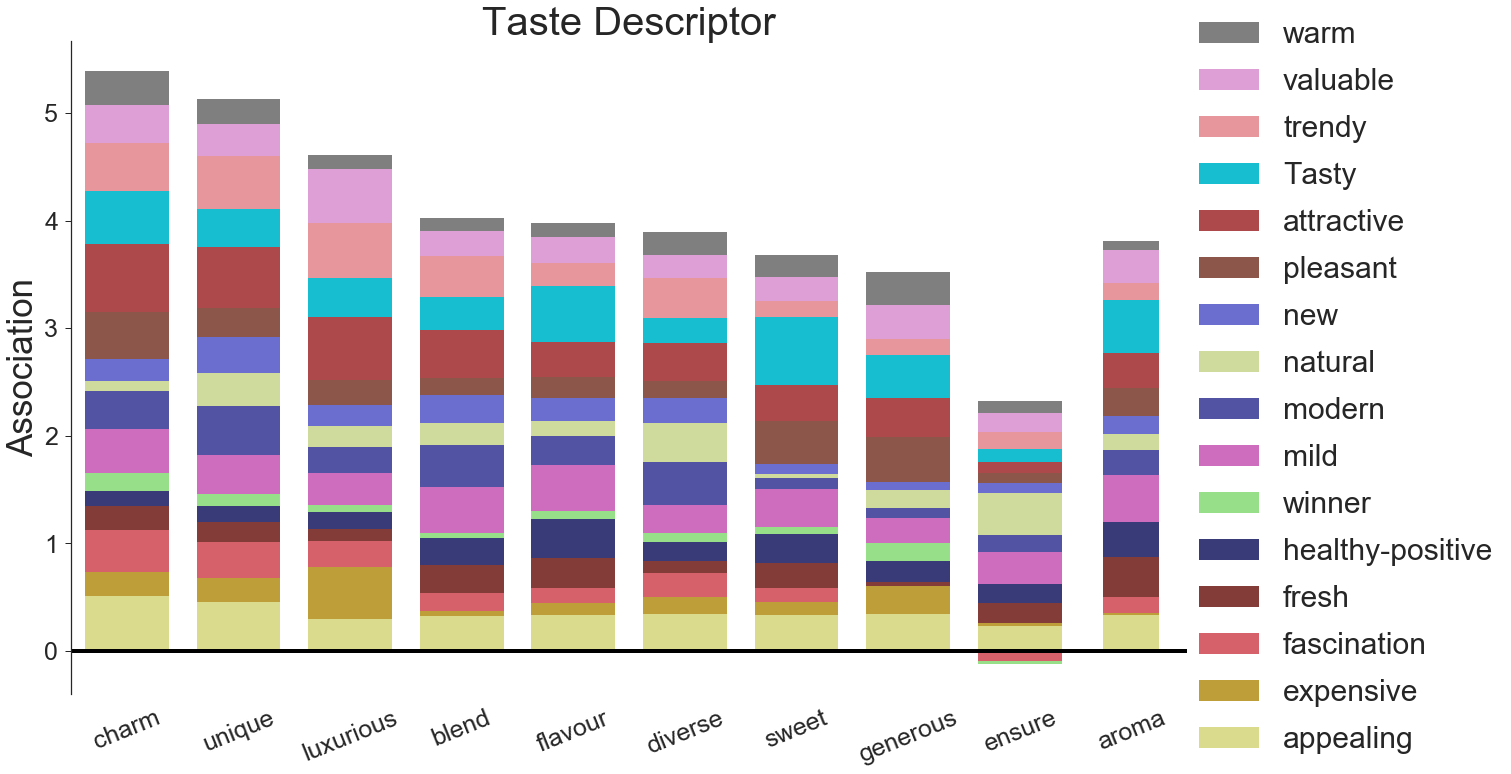

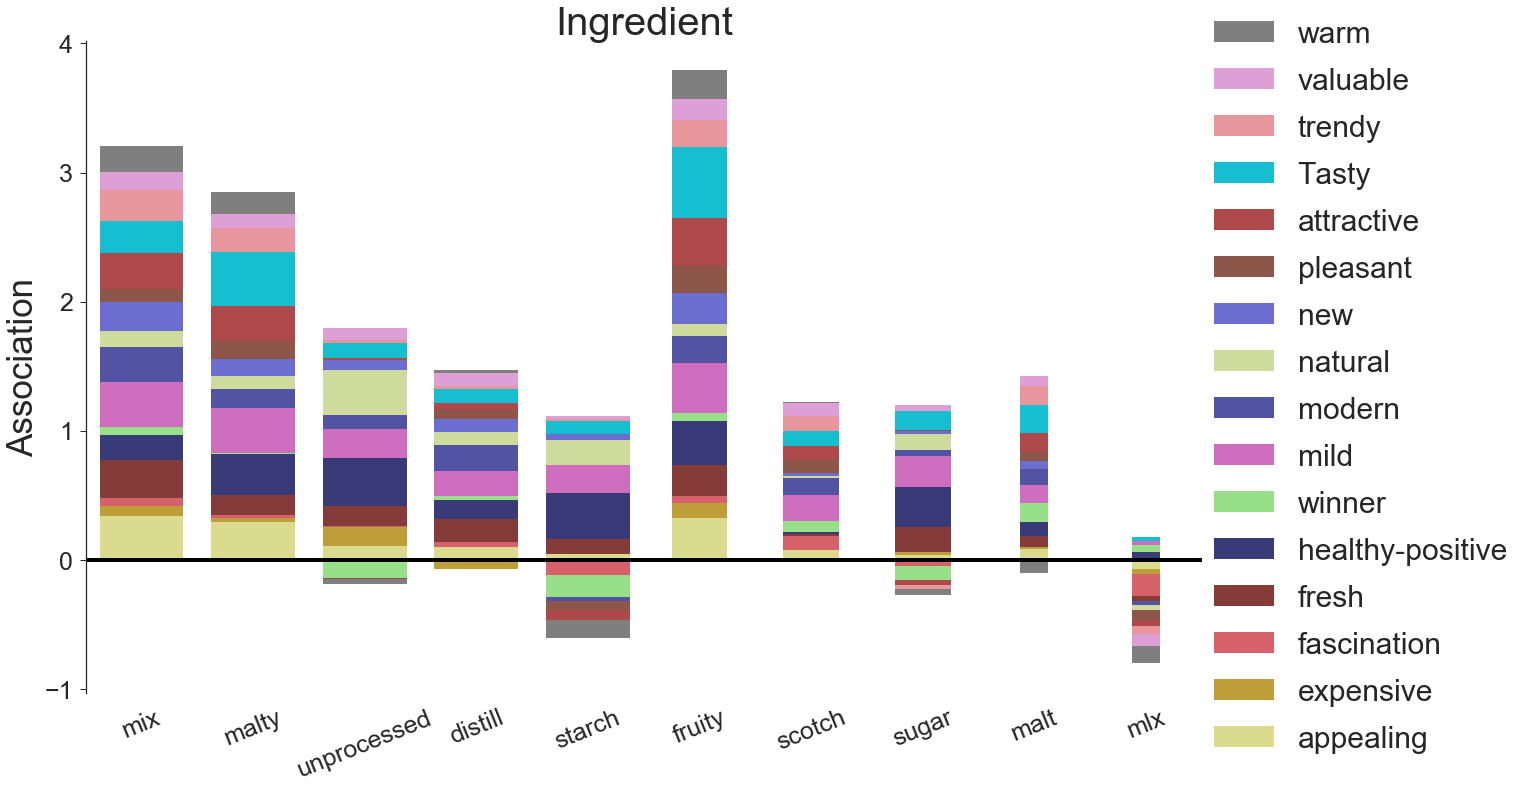

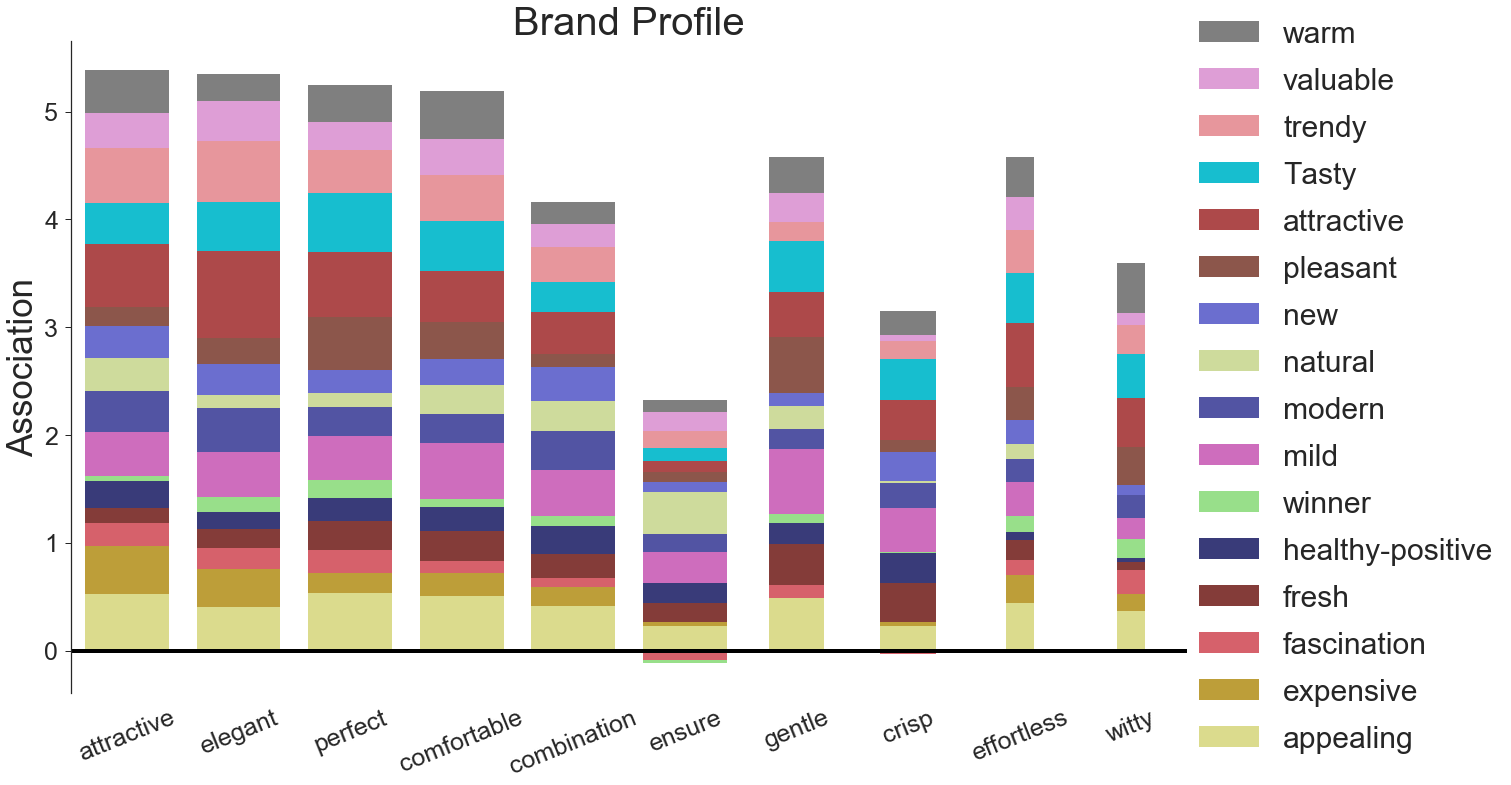

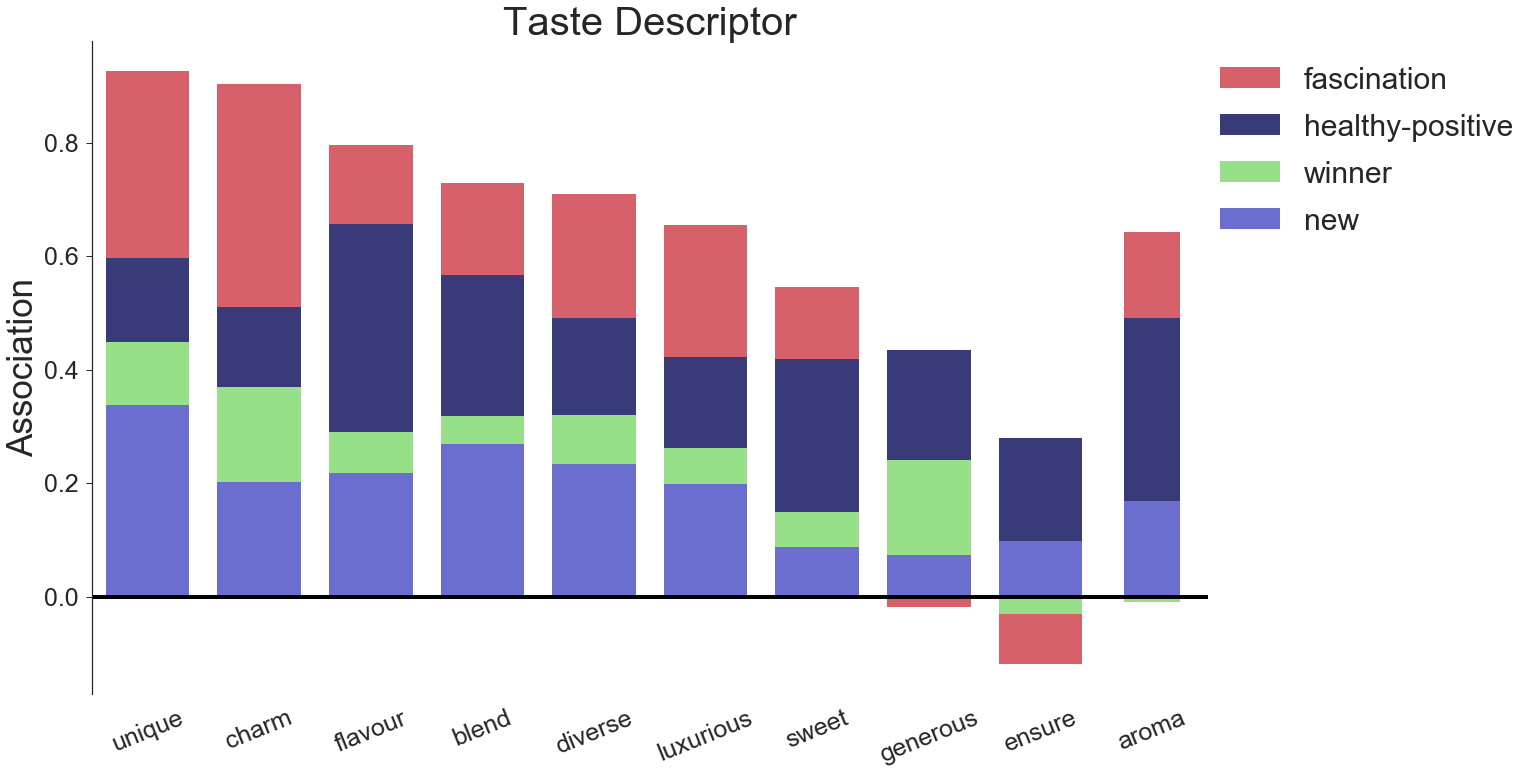

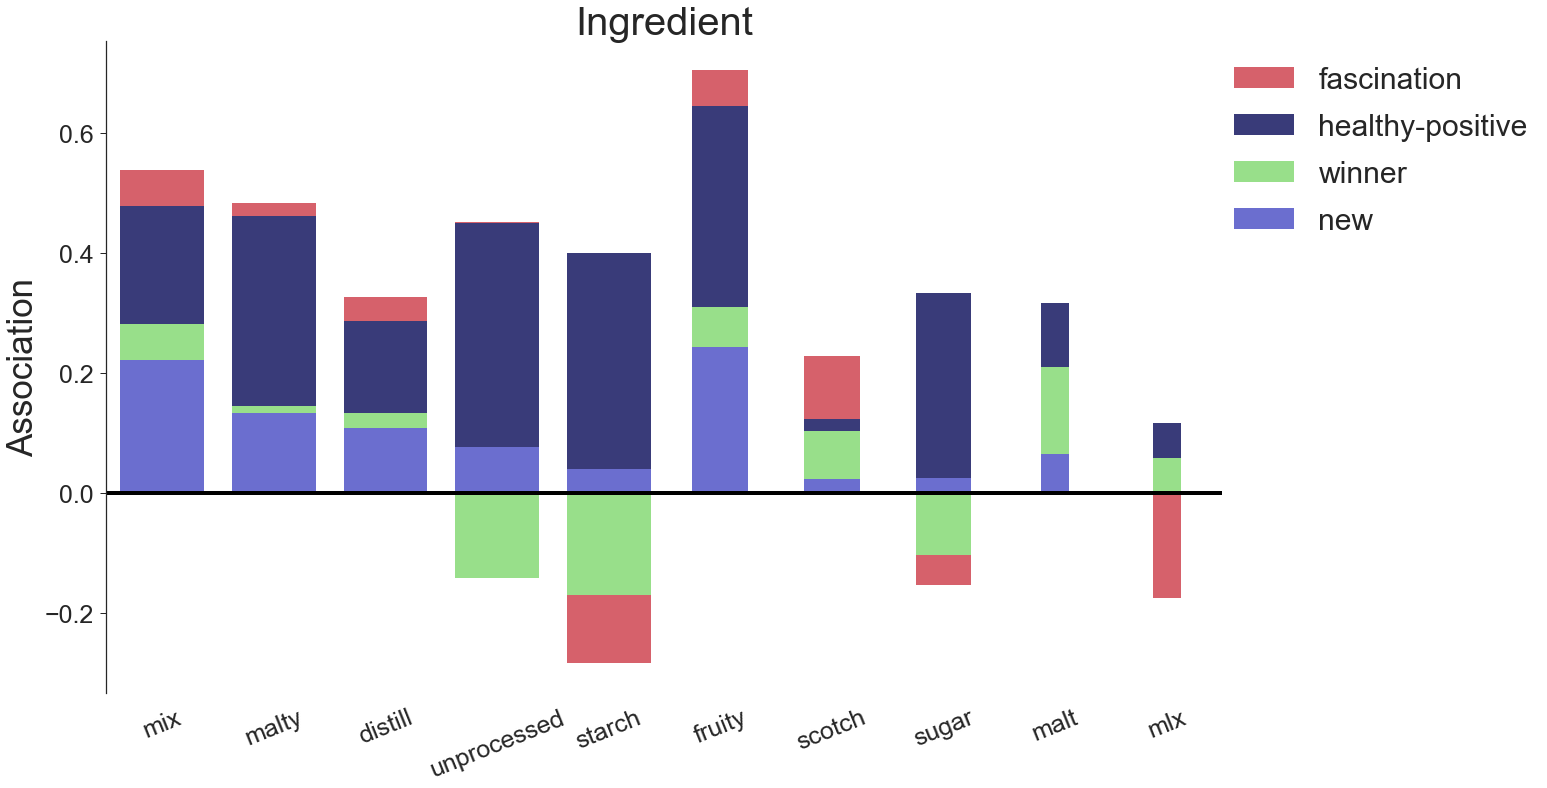

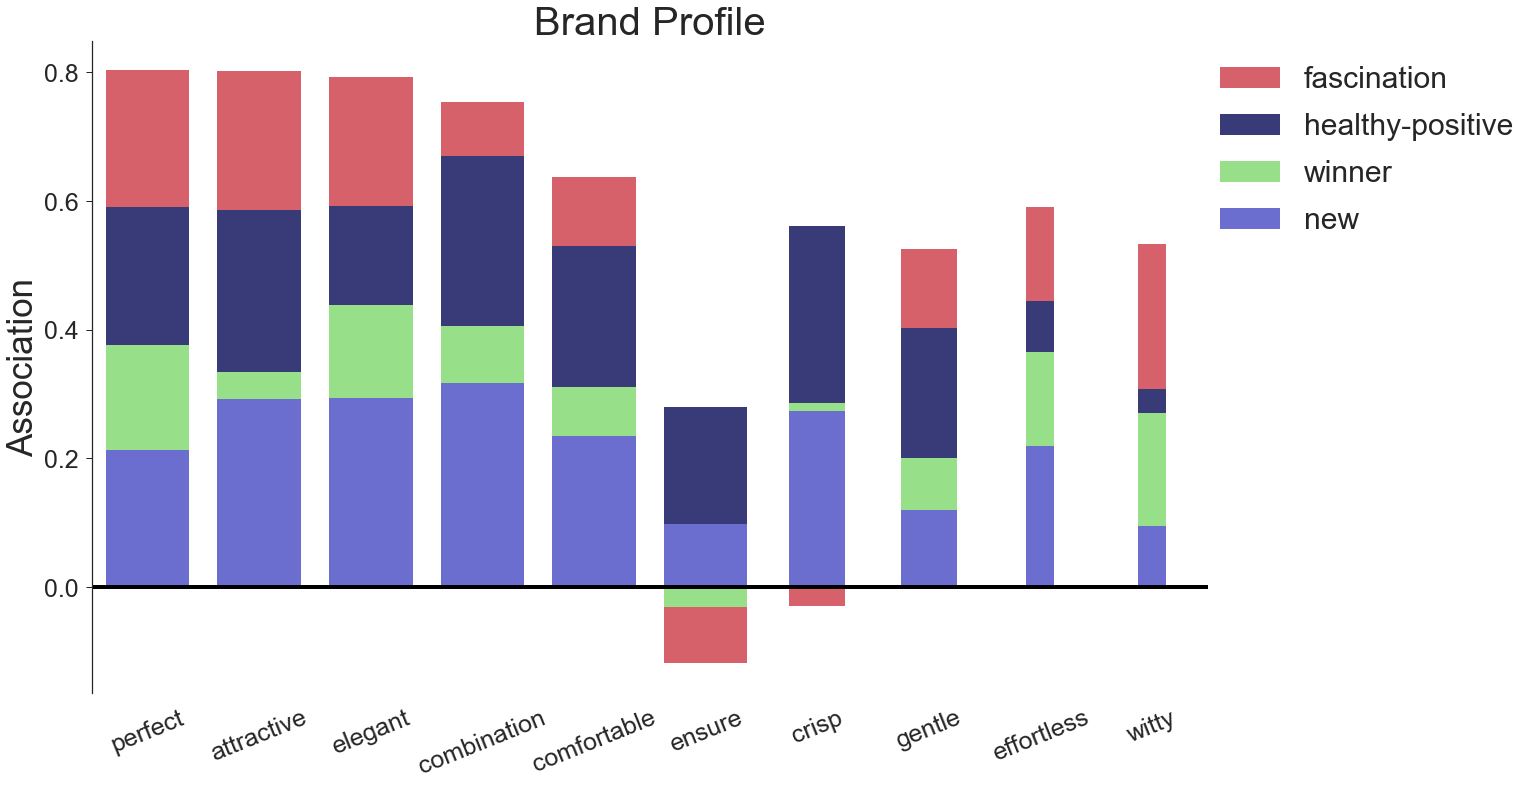

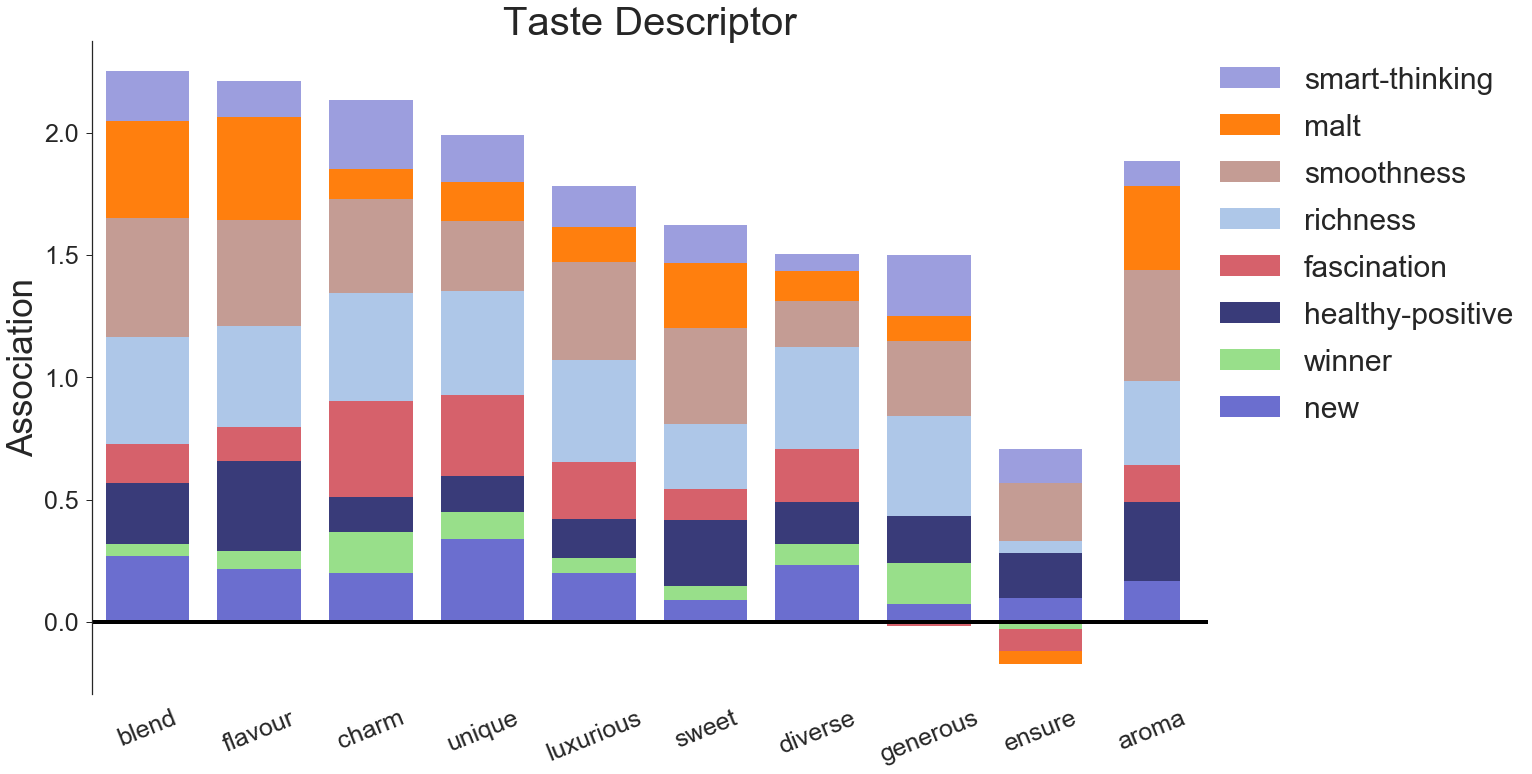

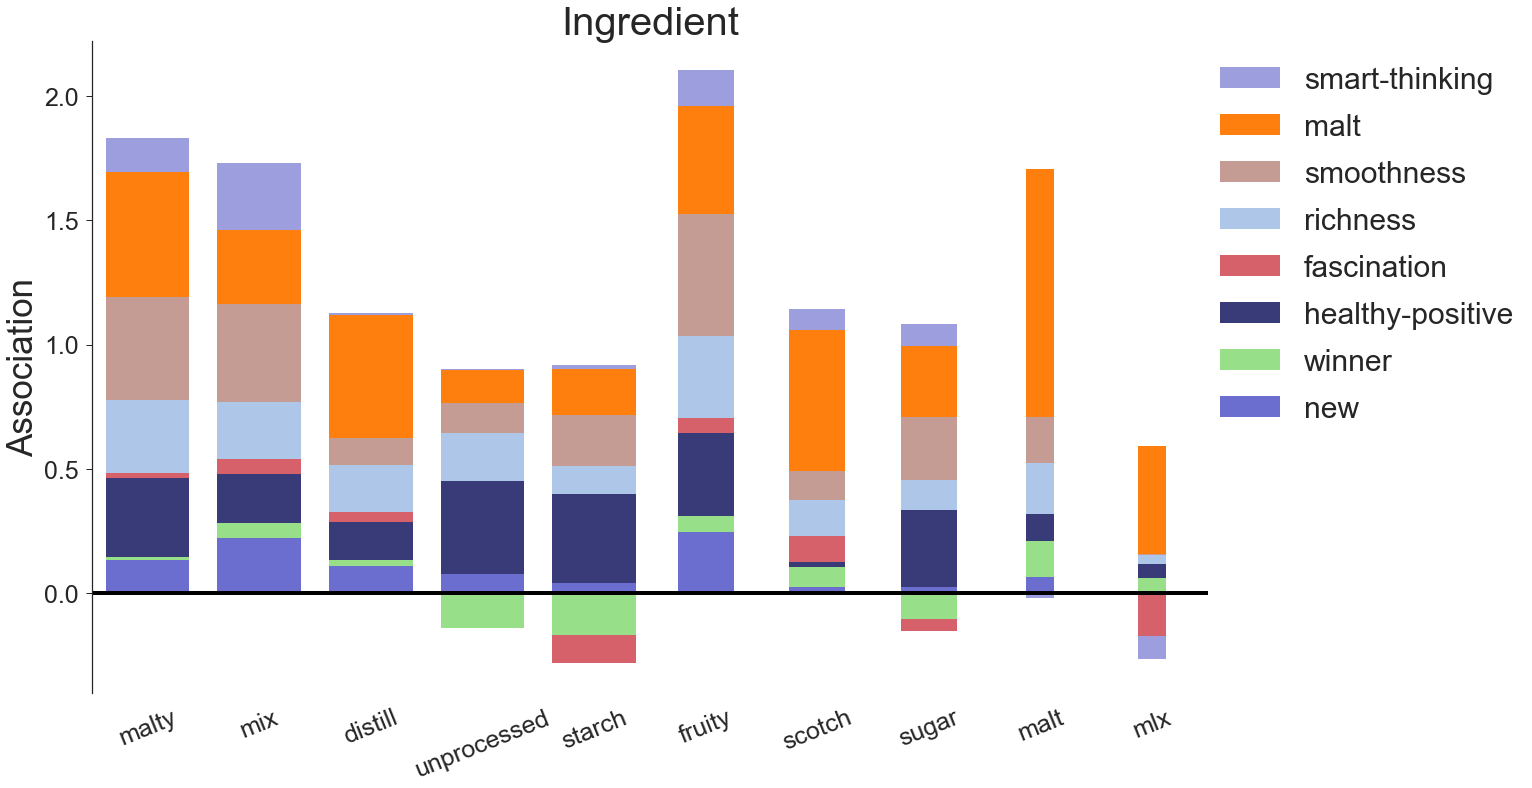

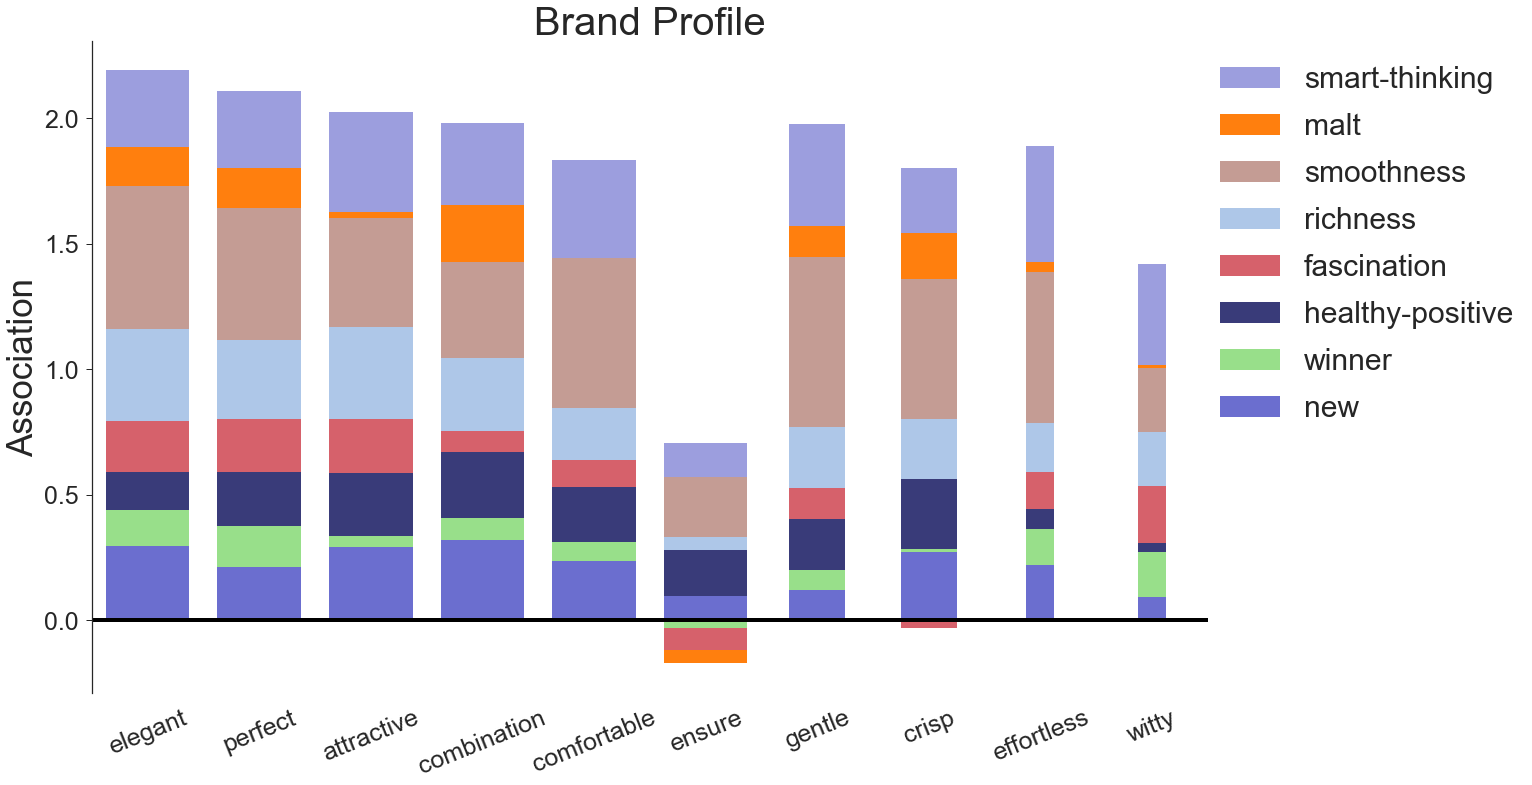

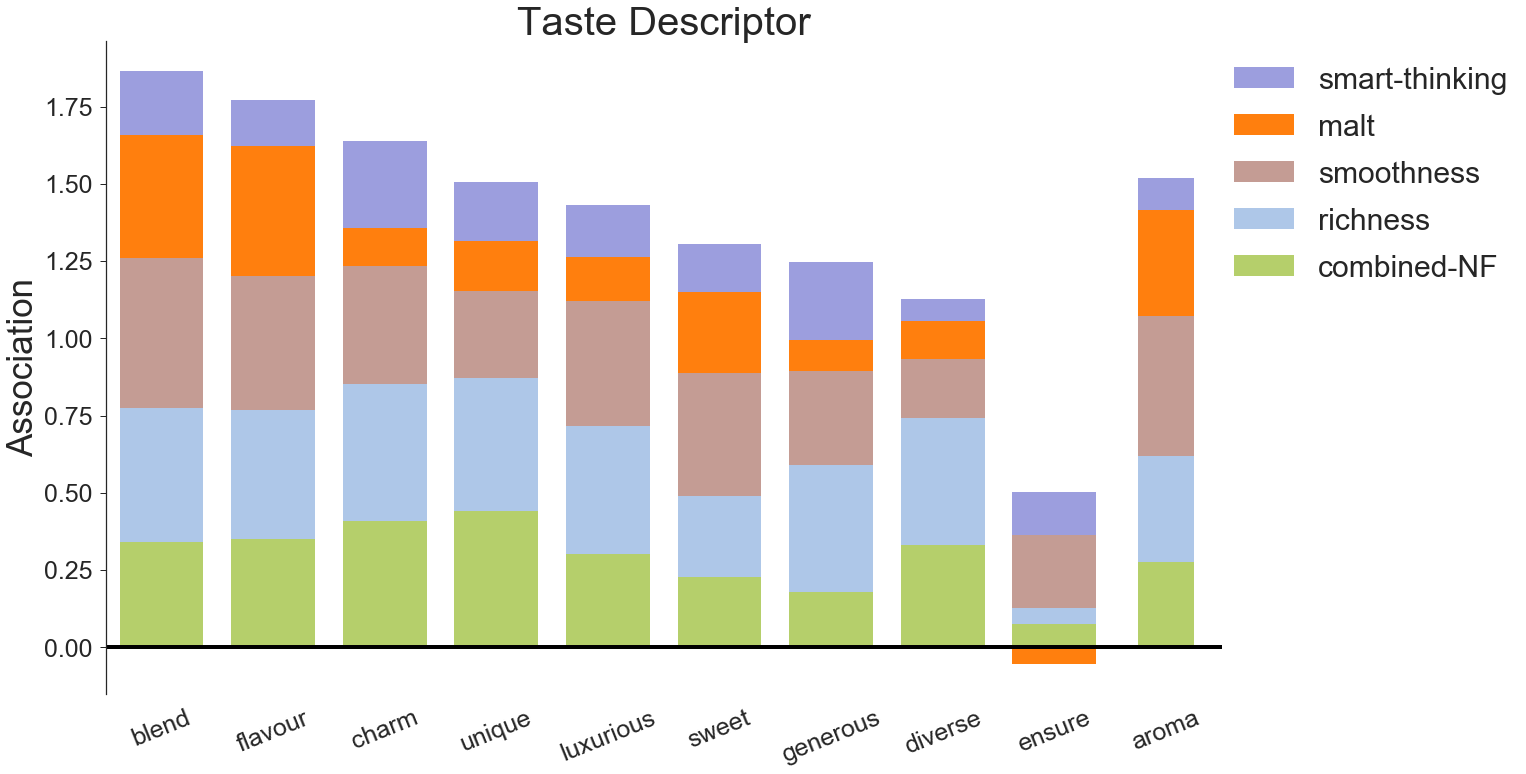

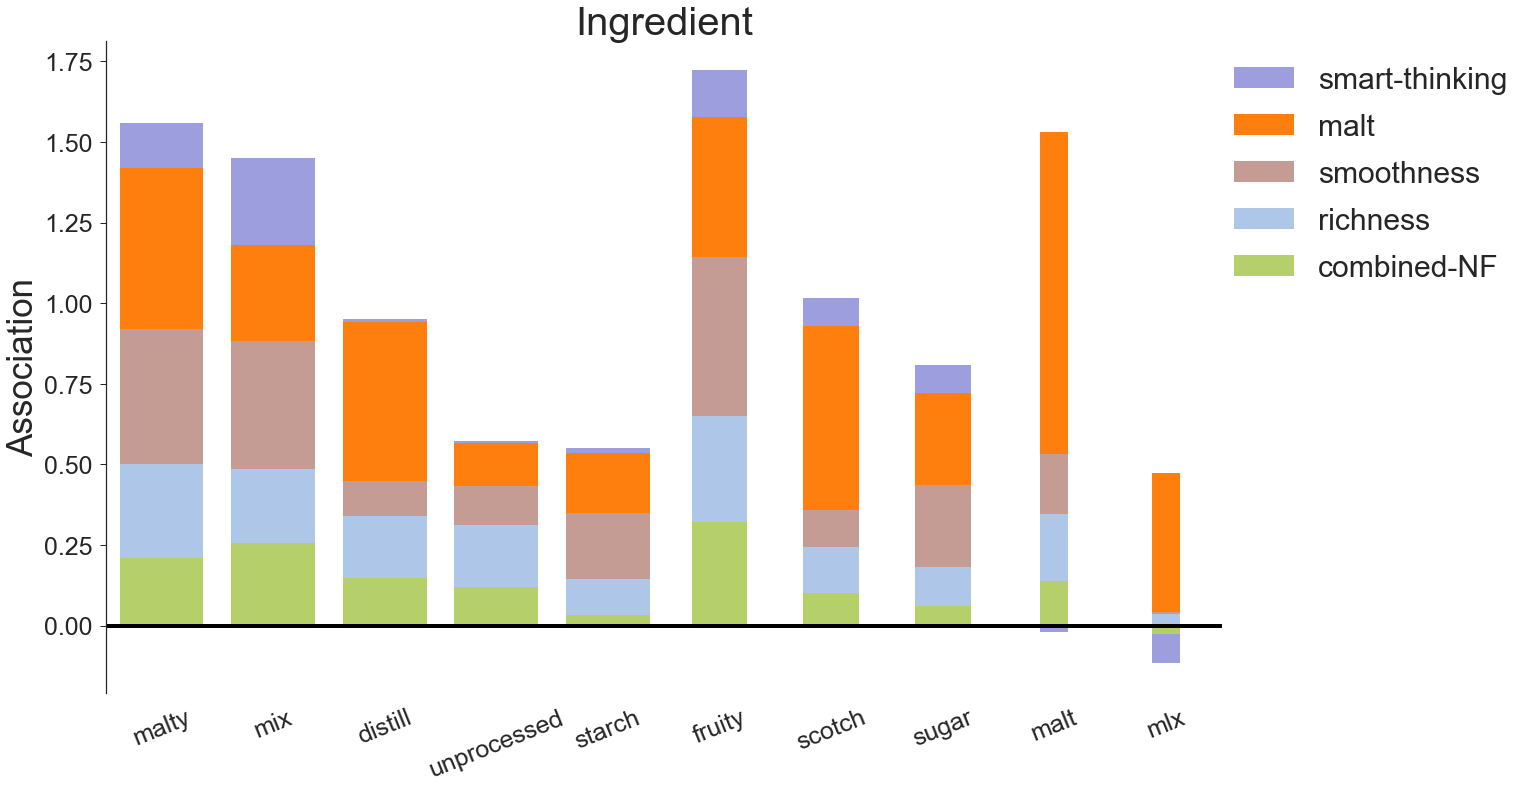

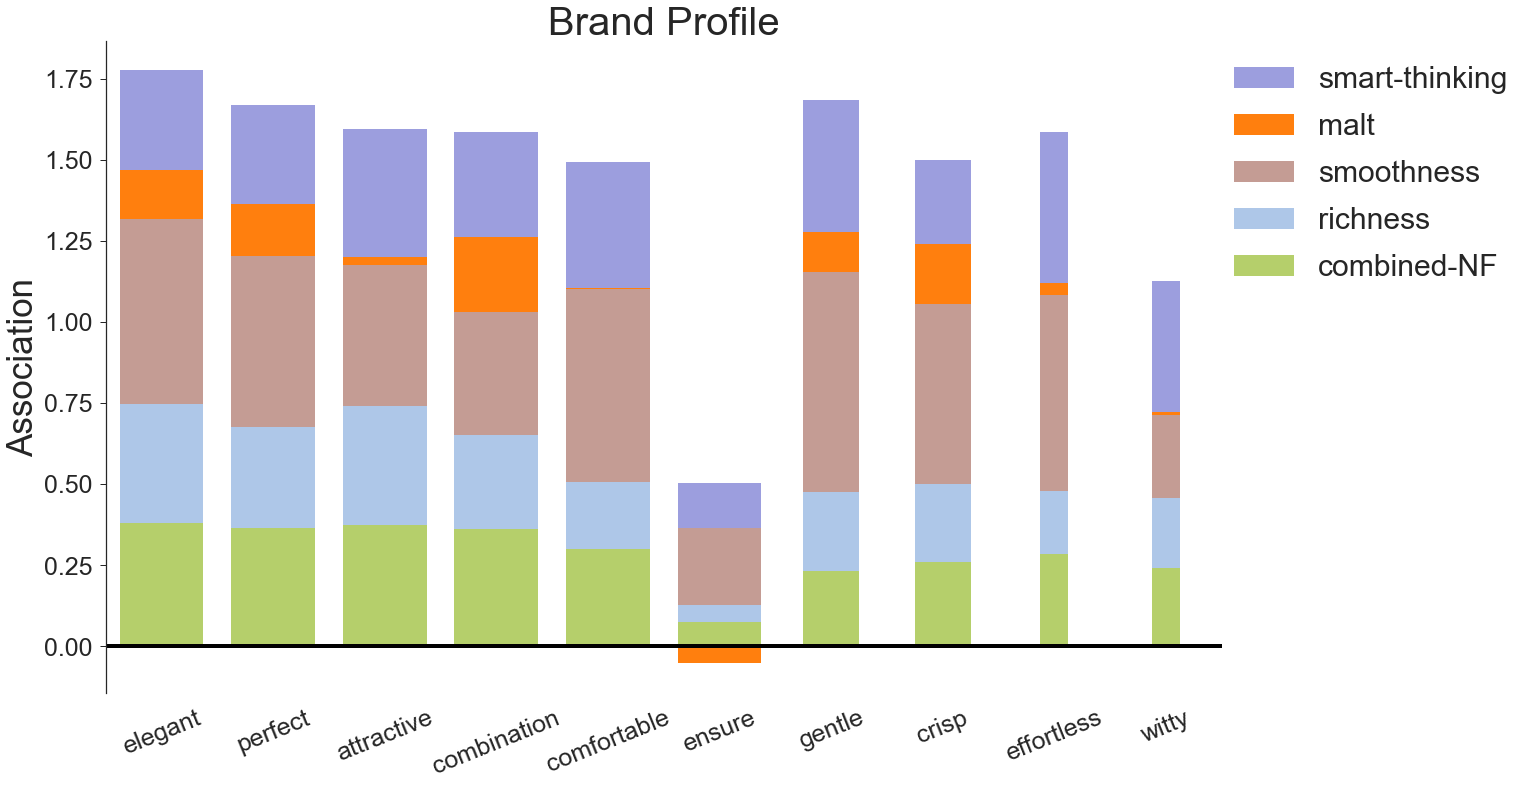

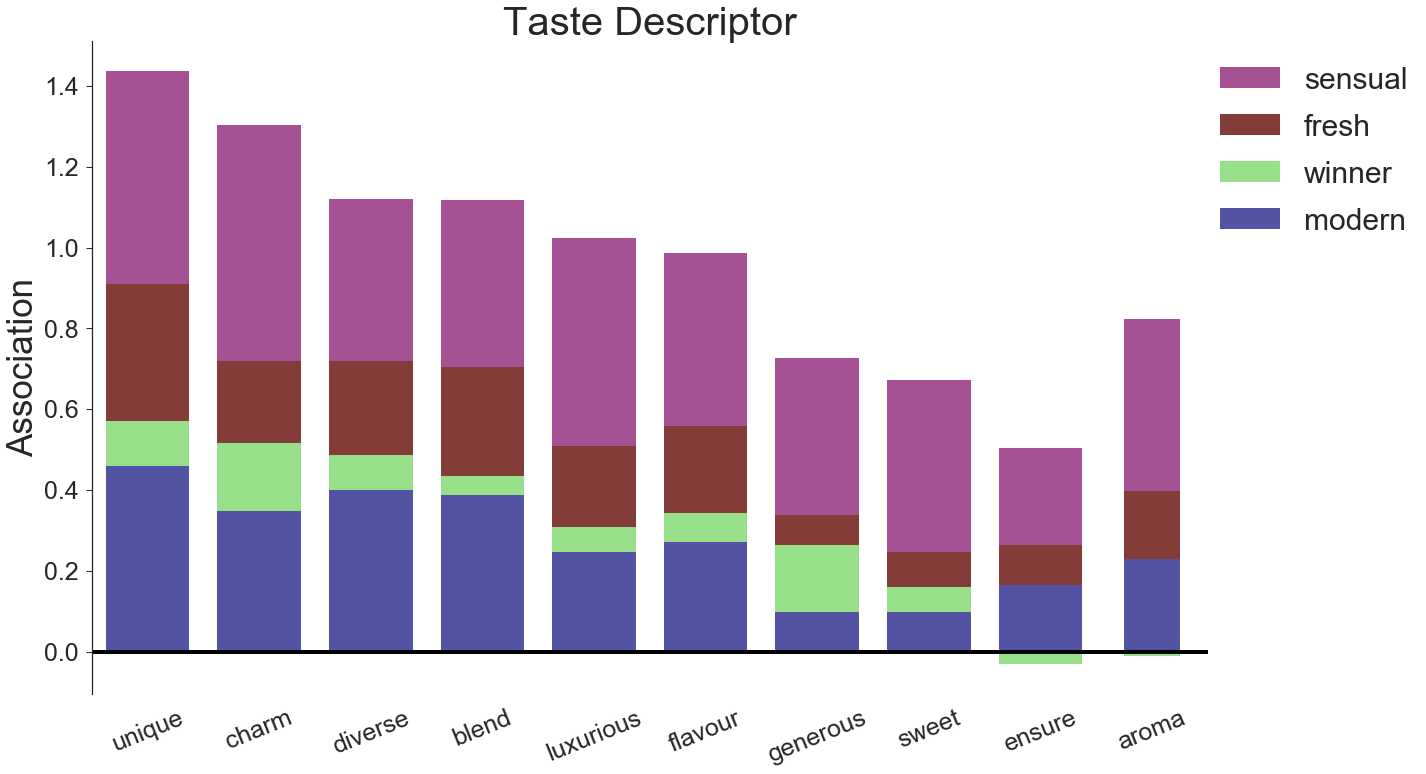

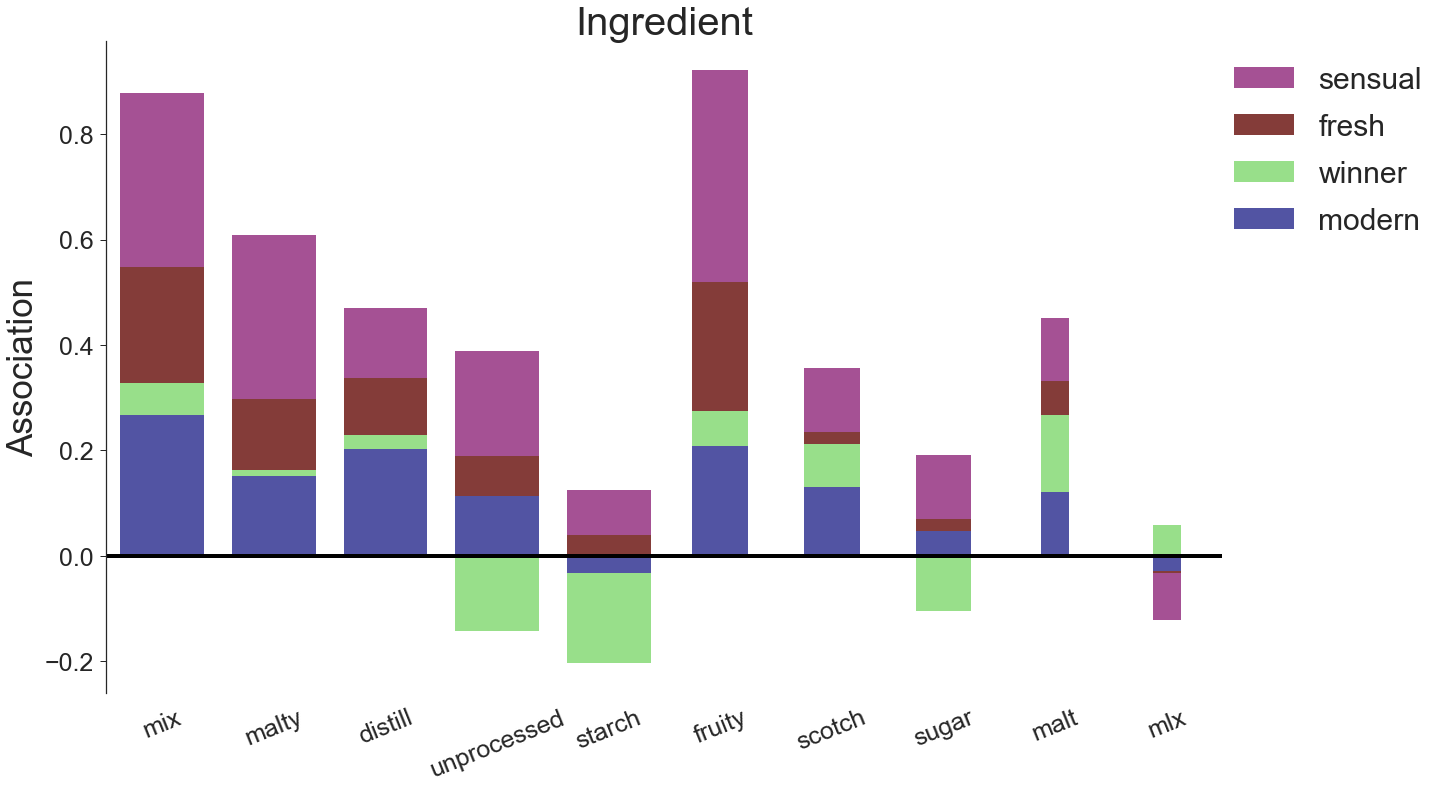

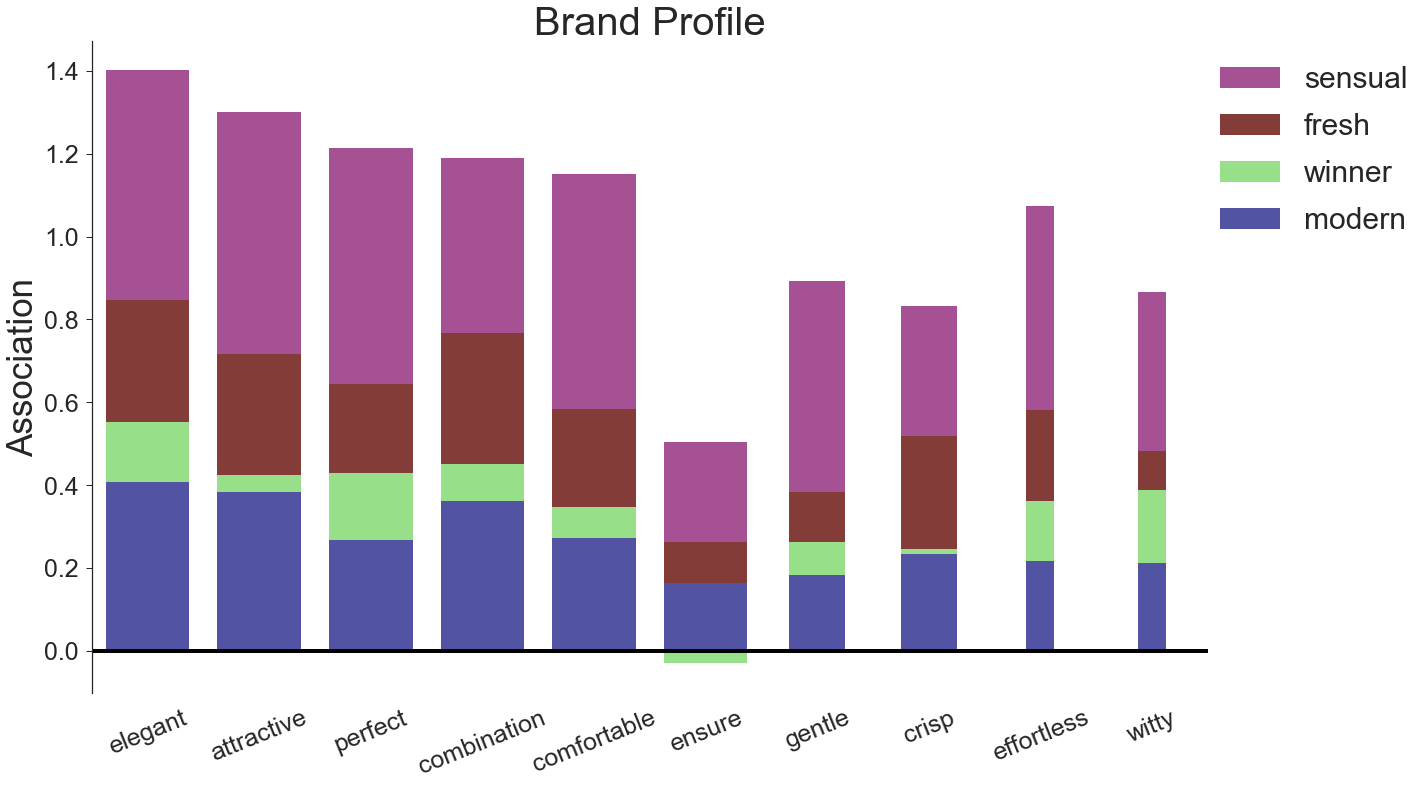

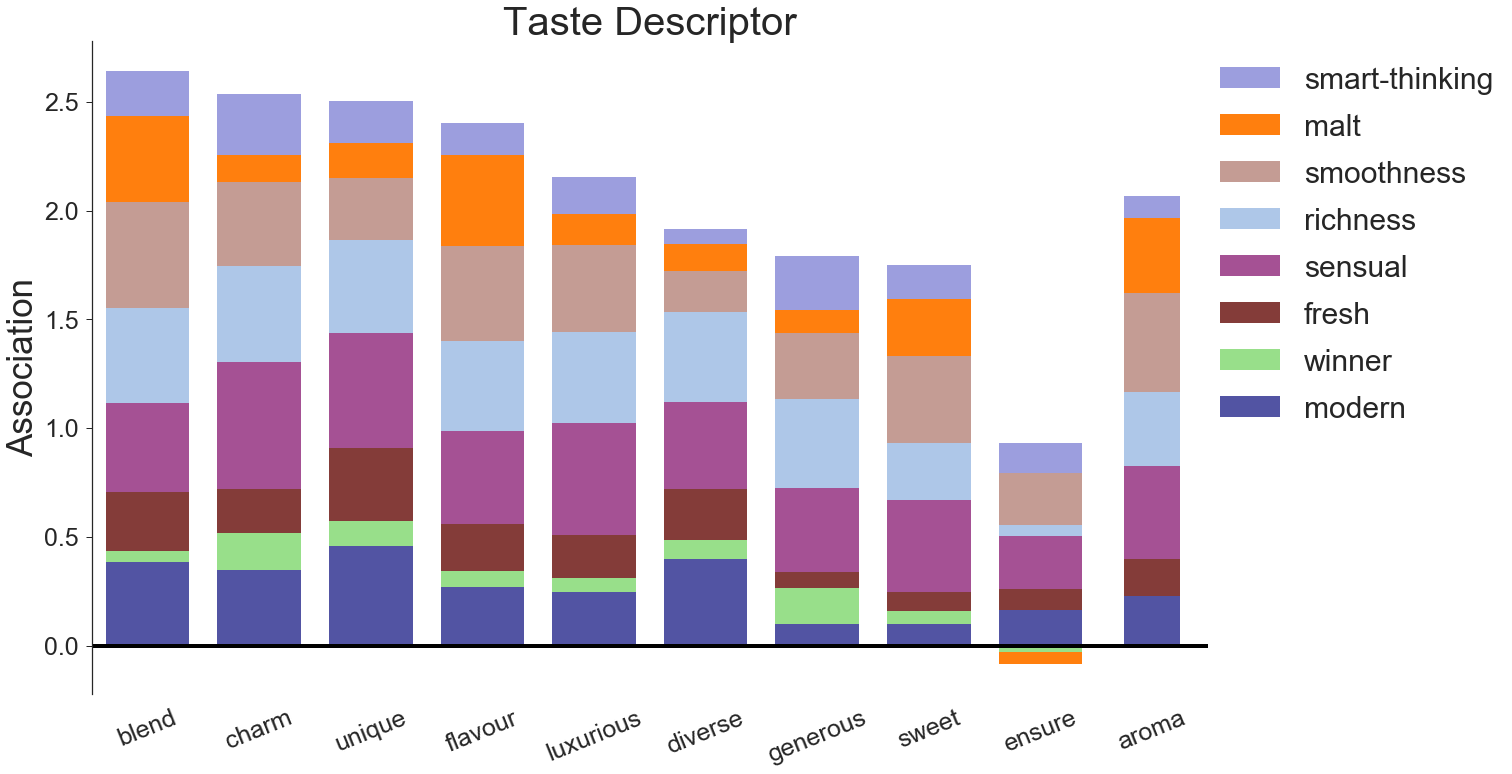

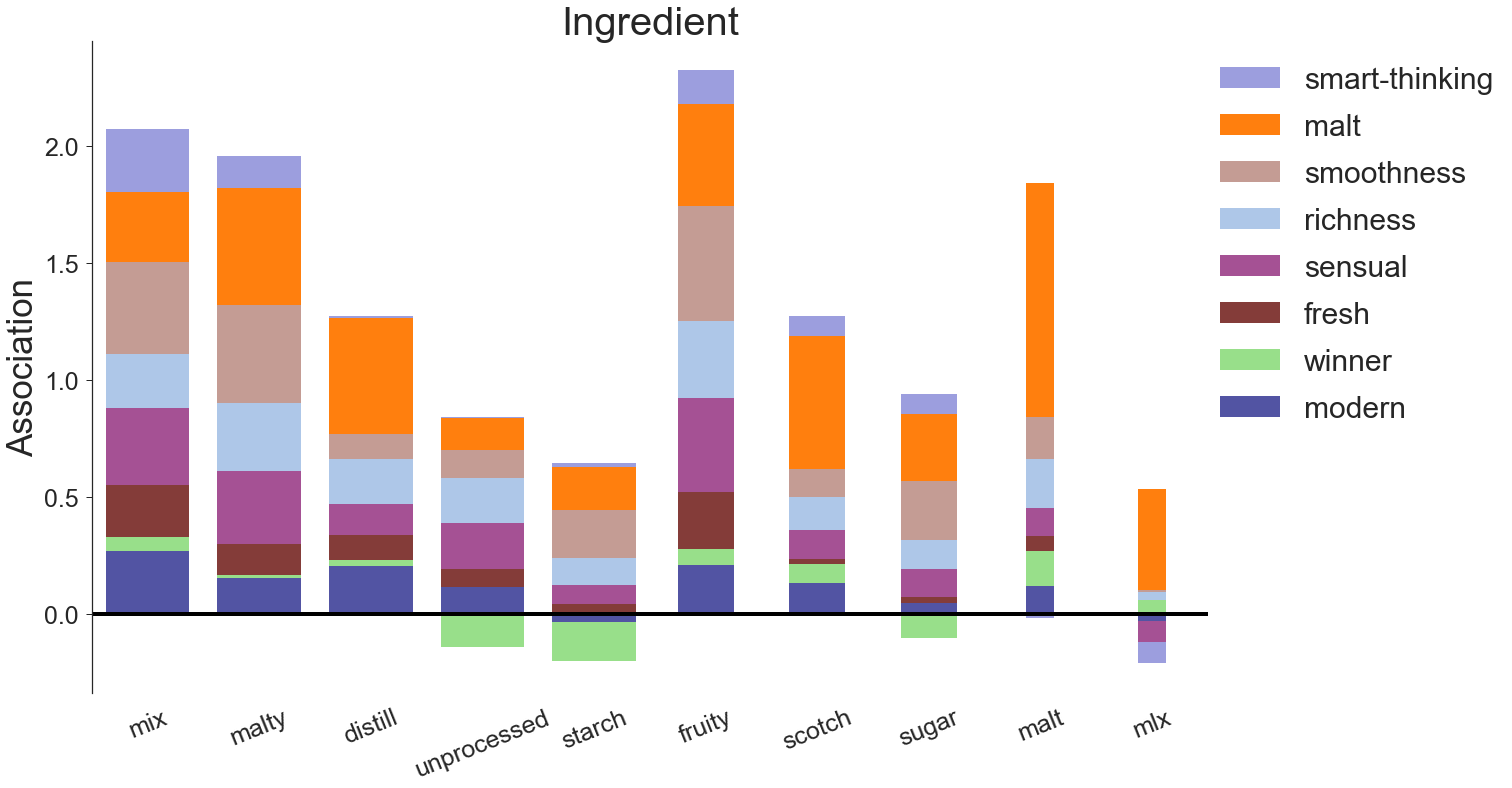

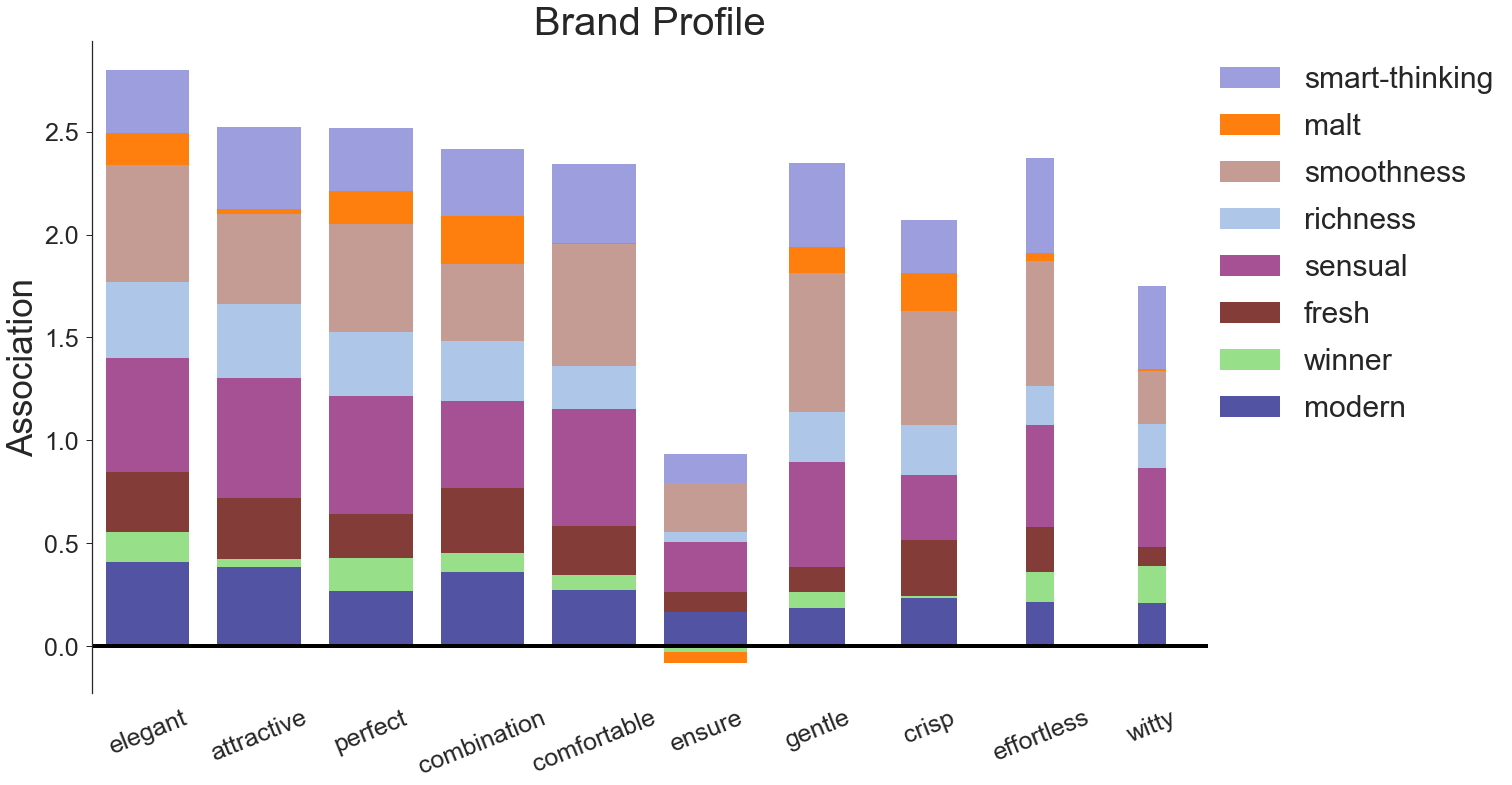

In [157]:
for mode in ['diageo', 'nf', 'top_nf', 'diageo+nf', 'diageo+nfreduced', 'clustered', 'diageo+clustered']:
    print(mode)
    solo_bar_plot(tf, 'Taste Descriptor', 10, mode)
    solo_bar_plot(ti, 'Ingredient', 10, mode)
    solo_bar_plot(ts, 'Brand Profile', 10, mode)

# Combination analysis

For the future

In [468]:
ti_words = return_top_k_words(ti.reset_index(), 10)
tf_words = return_top_k_words(tf.reset_index(), 10)
ts_words = return_top_k_words(ts.reset_index(), 10)

In [471]:
combinations = pd.DataFrame(list(product(ts_words, ti_words, tf_words)), columns = ['smart_thinking', 'ingredient', 'taste'])

In [473]:
combinations['smart_thinking_wv'] = combinations['smart_thinking'].map(lambda x: get_average_vector([x], emb))
combinations['ingredient_wv'] = combinations['ingredient'].map(lambda x: get_average_vector([x], emb))
combinations['taste_wv'] = combinations['taste'].map(lambda x: get_average_vector([x], emb))
combinations['wv'] = (combinations['smart_thinking_wv'] + combinations['ingredient_wv'] + combinations['taste_wv']) / 3

In [476]:
combinations = combinations.apply(lambda x: get_similarity_with_dimensions(x, chosen_ones), axis=1)
combinations = combinations.drop(columns=[x for x in combinations.columns if 'wv' in x])

In [478]:
combinations['label'] = combinations['smart_thinking'] + ' + ' + combinations['ingredient'] + ' + ' + combinations['taste']
combinations = combinations.set_index('label')

In [480]:
combinations['sum_over_dimensions'] = combinations['dim_dg_malt'] + combinations['dim_dg_smoothness'] + combinations['dim_dg_smart_thinking'] + combinations['dim_dg_richness']

In [482]:
combinations = combinations.sort_values('sum_over_dimensions', ascending=False)

In [483]:
combinations

,smart_thinking,ingredient,taste,dim_dg_malt,dim_dg_smoothness,dim_dg_smart_thinking,dim_dg_richness,sum_over_dimensions
label,,,,,,,,
subtle + malt + robust,subtle,malt,robust,0.695015,0.557965,0.375205,0.407421,2.035607
texture + malt + robust,texture,malt,robust,0.689446,0.583425,0.303466,0.442597,2.018934
texture + malt + extraordinary,texture,malt,extraordinary,0.693998,0.506595,0.235795,0.538950,1.975337
soft + malt + extraordinary,soft,malt,extraordinary,0.708634,0.548352,0.289824,0.425743,1.972553
subtle + malt + extraordinary,subtle,malt,extraordinary,0.683210,0.462580,0.297197,0.498010,1.940997
subtle + malt + rustic,subtle,malt,rustic,0.712726,0.508264,0.297077,0.404706,1.922773
subtle + malt + boast,subtle,malt,boast,0.723721,0.464709,0.250503,0.483148,1.922081
texture + malt + rustic,texture,malt,rustic,0.707258,0.535875,0.236122,0.438044,1.917298
soft + malt + robust,soft,malt,robust,0.667983,0.593894,0.339171,0.314228,1.915276
